<a href="https://colab.research.google.com/github/cychen116/DataAnalysis_practice/blob/main/SEAS6401_Final_Paper_DCBikeSharing_20201130_CYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/SEAS 6401/DC transportaion"
!ls "/content/drive/MyDrive/Colab Notebooks/SEAS 6401/DC transportaion"

 2011_Traffic_Volume.csv
 2012_Traffic_Volume.csv
'archive (1).zip'
 Capital_Bike_Share_Locations.csv
 carbondioxide9527.github.io-master.zip
 day_kaggle.csv
 hour_kaggle.csv
 hour_kaggle.csv.zip
 Metrobus_Priority_Corridor_Network.csv
 Metro_Bus_Stops.csv
 Metro_Lines.csv
 Metro_Station_Entrances_in_DC.csv
 Metro_Station_Entrances__Regional_.csv
 Metro_Stations_in_DC.csv
 Signed_Bike_Routes.csv
 Traffic_Monitoring_Stations.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dayDF = pd.read_csv(data_dir+"/day_kaggle.csv")
dayDF.head()

instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0        1  2011-01-01       1   0  ...   0.160446     331         654   985
1        2  2011-01-02       1   0  ...   0.248539     131         670   801
2        3  2011-01-03       1   0  ...   0.248309     120        1229  1349
3        4  2011-01-04       1   0  ...   0.160296     108        1454  1562
4        5  2011-01-05       1   0  ...   0.186900      82        1518  1600

[5 rows x 16 columns]

In [ ]:
hourDF = pd.read_csv(data_dir+"/hour_kaggle.csv")
hourDF.head()

instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0  ...        0.0       3          13   16
1        2  2011-01-01       1   0  ...        0.0       8          32   40
2        3  2011-01-01       1   0  ...        0.0       5          27   32
3        4  2011-01-01       1   0  ...        0.0       3          10   13
4        5  2011-01-01       1   0  ...        0.0       0           1    1

[5 rows x 17 columns]

In [ ]:
dayDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hourDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#Data Cleaning

## Rename Columns and Setting Data Type

In [ ]:
dayDF.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
hourDF.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
#Rename Columns
dayDF = dayDF.rename(columns = {'instant':'case_id',
                                'dteday':'datetime',
                                'yr':'year',
                                'mnth':'month', 
                                'holiday':'is_holiday',
                                'workingday':'is_workingday',
                                'weathersit':'weather', #1: Clear, Few clouds, Partly cloudy, Partly cloudy
                                                        #2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                                                        #3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                                                        #4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
                                'atemp':'temp_feeling', #Celsius
                                'hum':'humidity',
                                'casual':'cnt_casual',
                                'registered':'cnt_registered',
                                'cnt':'cnt_total'
                                })
#Setting Data Type
dayDF['datetime'] = pd.to_datetime(dayDF.datetime)


In [ ]:
#Rename Columns
hourDF = hourDF.rename(columns = {'instant':'case_id',
                                  'dteday':'datetime',
                                  'yr':'year',
                                  'mnth':'month',
                                  'hr':'hour', 
                                  'holiday':'is_holiday',
                                  'workingday':'is_workingday',
                                  'weathersit':'weather', #1: Clear, Few clouds, Partly cloudy, Partly cloudy
                                                          #2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                                                          #3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                                                          #4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
                                  'atemp':'temp_feeling', #Celsius
                                  'hum':'humidity',
                                  'casual':'cnt_casual',
                                  'registered':'cnt_registered',
                                  'cnt':'cnt_total'
                                  })
#Setting Data Type
hourDF['datetime'] = pd.to_datetime(hourDF.datetime)


In [ ]:
dayDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   case_id         731 non-null    int64         
 1   datetime        731 non-null    datetime64[ns]
 2   season          731 non-null    int64         
 3   year            731 non-null    int64         
 4   month           731 non-null    int64         
 5   is_holiday      731 non-null    int64         
 6   weekday         731 non-null    int64         
 7   is_workingday   731 non-null    int64         
 8   weather         731 non-null    int64         
 9   temp            731 non-null    float64       
 10  temp_feeling    731 non-null    float64       
 11  humidity        731 non-null    float64       
 12  windspeed       731 non-null    float64       
 13  cnt_casual      731 non-null    int64         
 14  cnt_registered  731 non-null    int64         
 15  cnt_to

#Analysis

## Data Summary

In [ ]:
dayDF.describe()

case_id      season  ...  cnt_registered    cnt_total
count  731.000000  731.000000  ...      731.000000   731.000000
mean   366.000000    2.496580  ...     3656.172367  4504.348837
std    211.165812    1.110807  ...     1560.256377  1937.211452
min      1.000000    1.000000  ...       20.000000    22.000000
25%    183.500000    2.000000  ...     2497.000000  3152.000000
50%    366.000000    3.000000  ...     3662.000000  4548.000000
75%    548.500000    3.000000  ...     4776.500000  5956.000000
max    731.000000    4.000000  ...     6946.000000  8714.000000

[8 rows x 15 columns]

In [ ]:
hourDF.describe()

case_id        season  ...  cnt_registered     cnt_total
count  17379.0000  17379.000000  ...    17379.000000  17379.000000
mean    8690.0000      2.501640  ...      153.786869    189.463088
std     5017.0295      1.106918  ...      151.357286    181.387599
min        1.0000      1.000000  ...        0.000000      1.000000
25%     4345.5000      2.000000  ...       34.000000     40.000000
50%     8690.0000      3.000000  ...      115.000000    142.000000
75%    13034.5000      3.000000  ...      220.000000    281.000000
max    17379.0000      4.000000  ...      886.000000    977.000000

[8 rows x 16 columns]

## Time Distribution

### Year

Review the usage distribution between 2011 & 2012

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


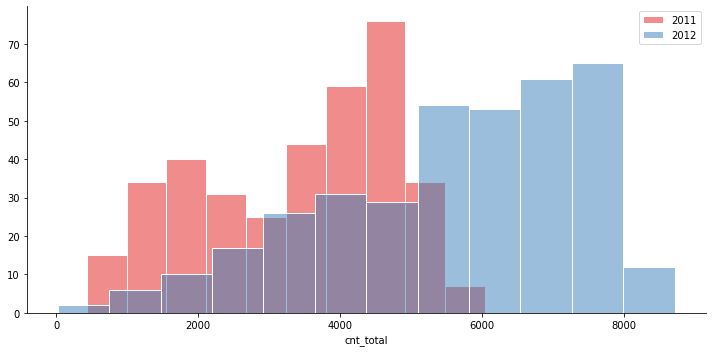

In [ ]:
g=sns.FacetGrid(dayDF, hue='year', palette='Set1',size=5,aspect=2)
g=g.map(sns.histplot,'cnt_total',alpha=0.5, edgecolor='w')
g.set_axis_labels()
plt.legend(['2011','2012'])

year
0    1243103
1    2049576
Name: cnt_total, dtype: int64


([<matplotlib.axis.XTick at 0x7f7966d26dd8>,
 [Text(0, 0, '2011'), Text(0, 0, '2012')])

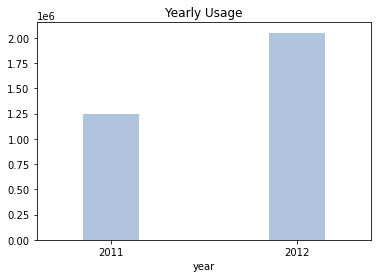

In [ ]:
print(dayDF['cnt_total'].groupby(dayDF['year']).sum())
dayDF['cnt_total'].groupby(dayDF['year']).sum().plot(kind='bar', width =0.30, color = 'lightsteelblue')
plt.title('Yearly Usage')
plt.xticks([0,1],['2011','2012'], rotation=0)

We can tell that the total usage of 2012 is greater than 2011.

###Daily

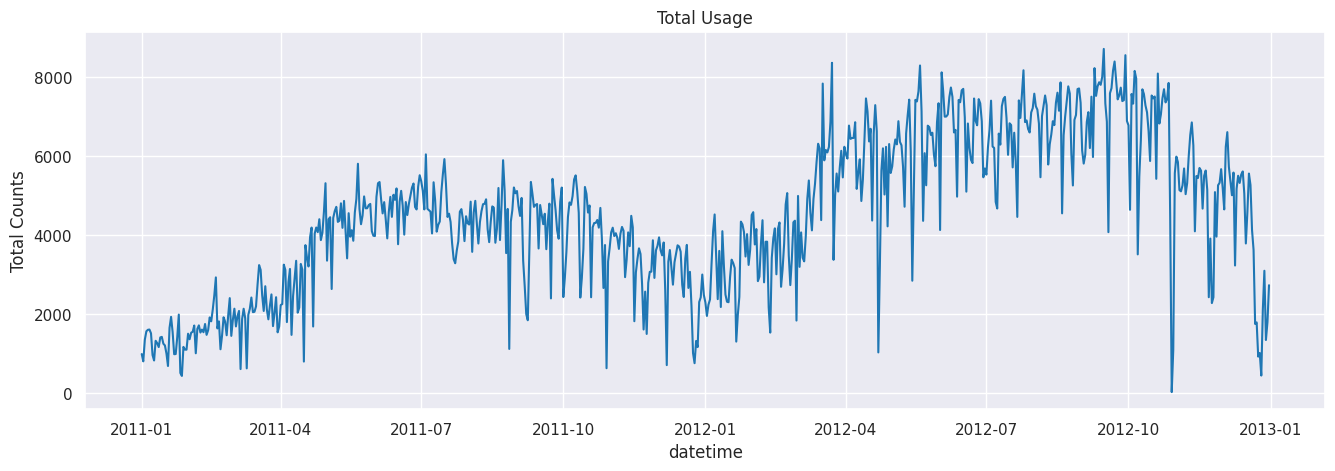

In [ ]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
def plot_df(df, x, y, title="", xlabel='datetime', dpi=100, color = 'color'):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color= color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel='Total Counts')
    plt.show()

plot_df(dayDF, x=dayDF.datetime, y=dayDF.cnt_total, title='Total Usage', color ='tab:blue')

Text(0.5, 0, 'Date')

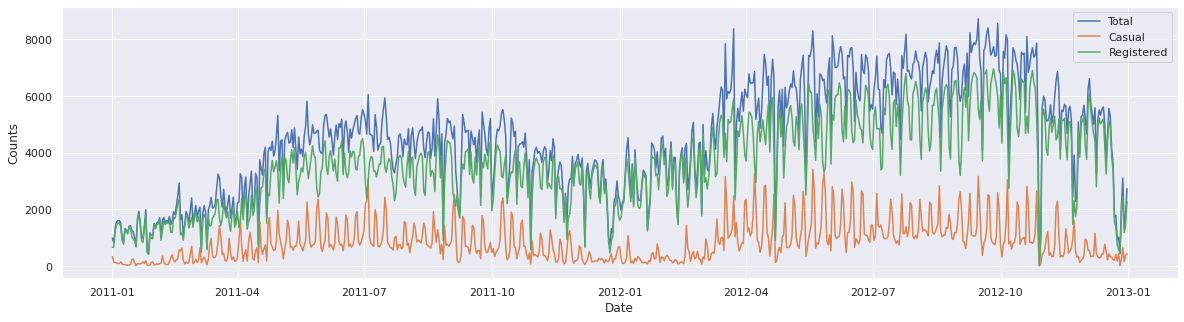

In [ ]:
fig,ax = plt.subplots(figsize=(, 5))
sns.lineplot(data=dayDF,x='datetime',y='cnt_total',label='Total', )#marker ='')
sns.lineplot(data=dayDF,x='datetime',y='cnt_casual',label='Casual',)#marker ='o')
sns.lineplot(data=dayDF,x='datetime',y='cnt_registered',label='Registered',)#marker ='o')
plt.legend()
#plt.title('Monthly distribution of counts')
plt.ylabel('Counts')
plt.xlabel('Date')
#plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12))

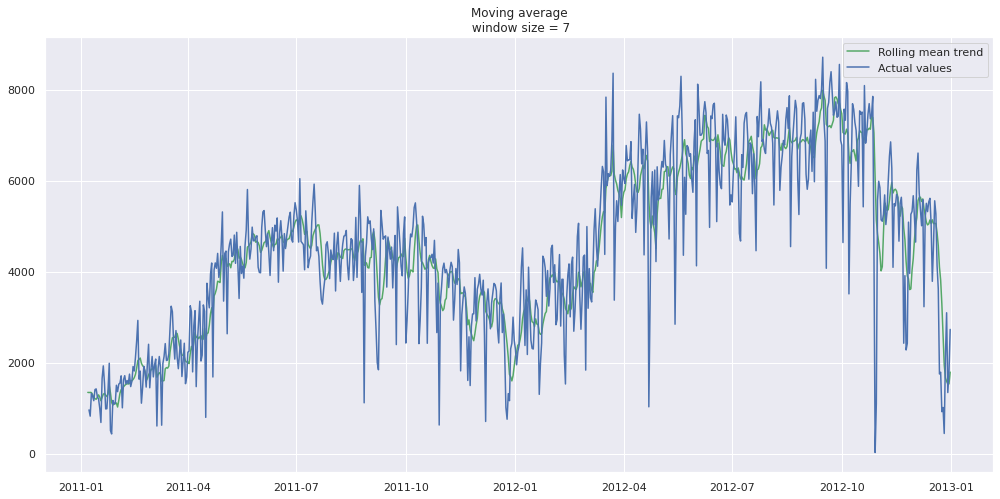

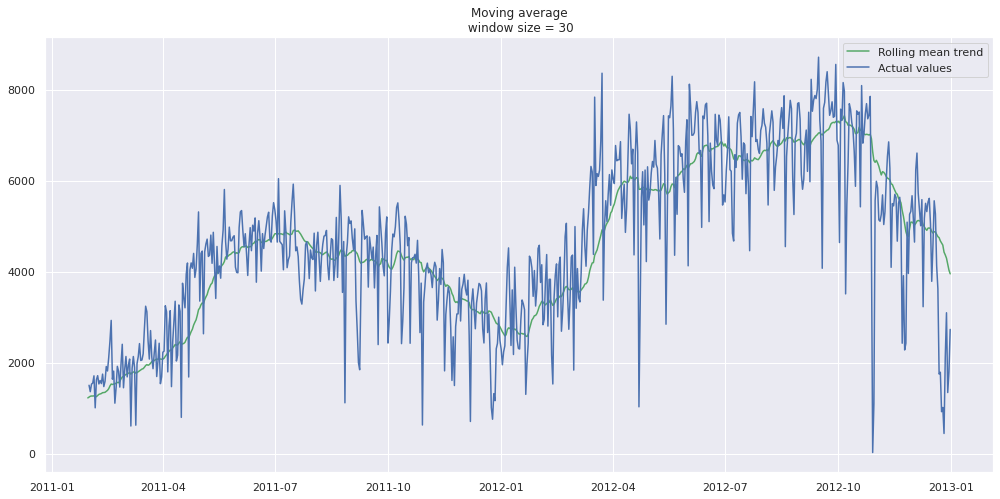

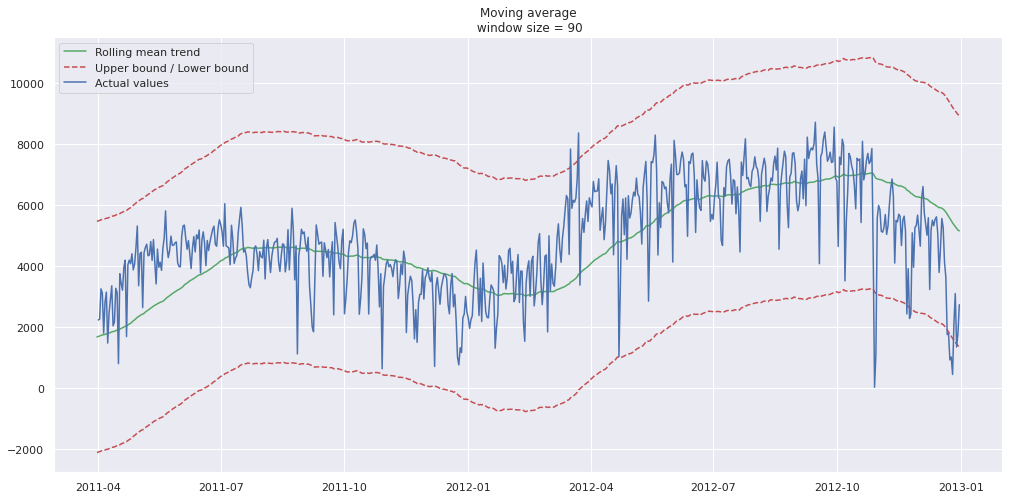

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()  # define window to apply the moving average model to smooth the time series, and highlight different trends
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

dayDF.set_index('datetime',inplace=True)

#Smooth by the previous 5 days (by week)
plot_moving_average(dayDF.cnt_total, 7)
#Smooth by the previous month (30 days)
plot_moving_average(dayDF.cnt_total, 30)
#Smooth by previous quarter (90 days)
plot_moving_average(dayDF.cnt_total, 90, plot_intervals=True)

dayDF.reset_index(inplace=True)

###Seasons

Review the usage distribution in the four different seasons.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f3b8f49eb00>,
 [Text(0, 0, '2011'), Text(0, 0, '2012')])

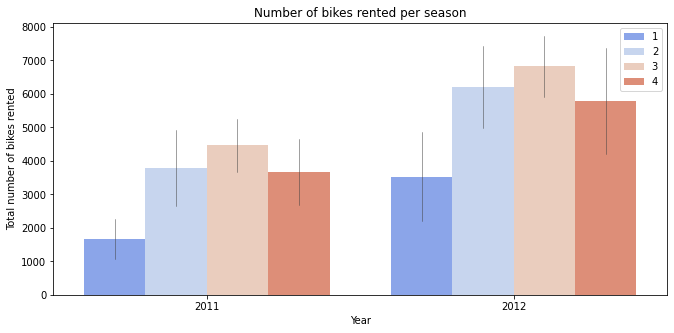

In [ ]:
plt.figure(figsize=(11,5))
sns.barplot('year','cnt_total',hue='season', data=dayDF, palette='coolwarm', ci='sd',errwidth=0.5)
plt.legend(loc='upper right',)
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')
plt.title('Number of bikes rented per season')
plt.xticks([0,1],['2011','2012'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f3b8f3129b0>,
 [Text(0, 0, '2011'), Text(0, 0, '2012')])

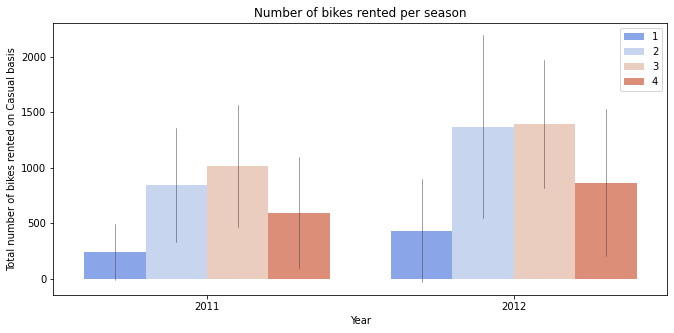

In [ ]:
plt.figure(figsize=(11,5))
sns.barplot('year','cnt_casual',hue='season', data=dayDF, palette='coolwarm', ci='sd',errwidth=0.5)
plt.legend(loc='upper right',)
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')
plt.xticks([0,1],['2011','2012'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f3b8f39e5f8>,
 [Text(0, 0, '2011'), Text(0, 0, '2012')])

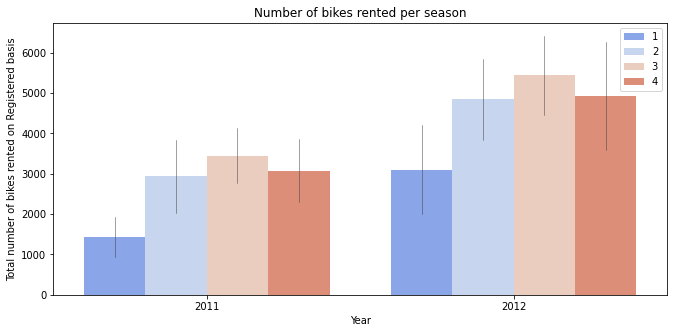

In [ ]:
plt.figure(figsize=(11,5))
sns.barplot('year','cnt_registered',hue='season', data=dayDF, palette='coolwarm', ci='sd',errwidth=0.5)
plt.legend(loc='upper right',)
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')
plt.xticks([0,1],['2011','2012'])

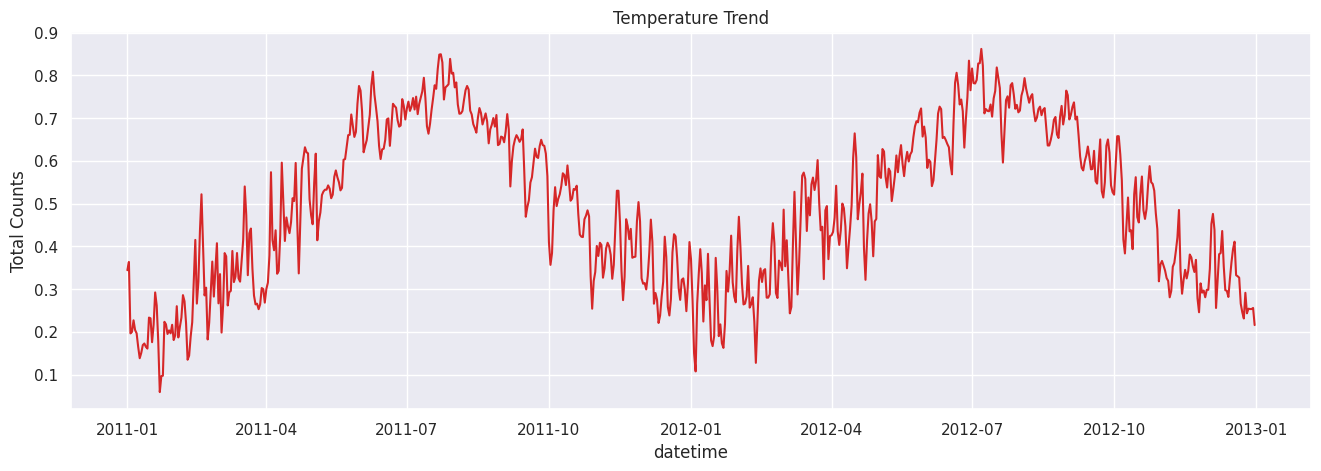

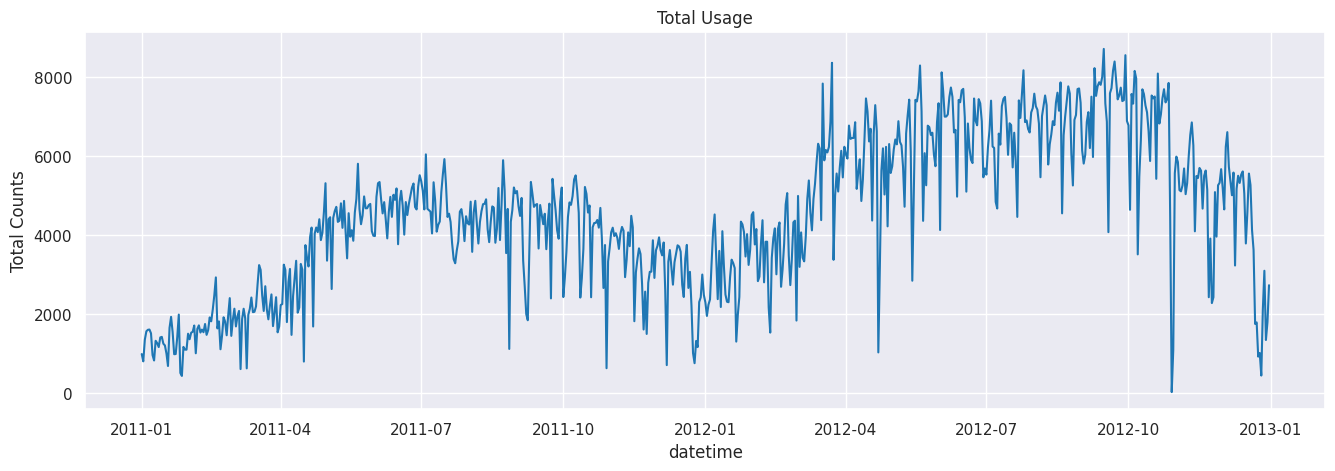

In [ ]:
plot_df(dayDF, x=dayDF.datetime, y=dayDF.temp, title='Temperature Trend',color ='tab:red')
plot_df(dayDF, x=dayDF.datetime, y=dayDF.cnt_total, title='Total Usage', color ='tab:blue')

We can see the distributions of seasons are similar by total basis, casual users basis and registered users basis. The first season has the lowest usage. The usage will increase and drop down at 4th season. The weather conditions may be the reasons.

###Months

Review the usage distribution by month

Text(0.5, 1.0, 'Registered Counts')

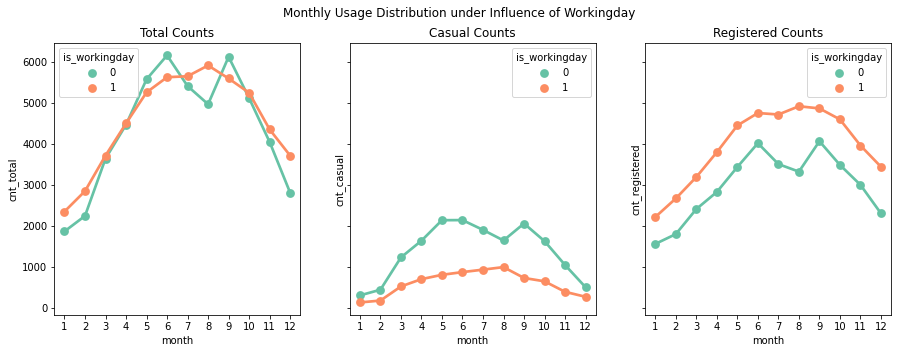

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(15, 5), sharey=True)
fig.suptitle('Monthly Usage Distribution under the Influence of Workingday')
sns.pointplot(ax=ax[0],x='month',y='cnt_total', hue='is_workingday',data=dayDF,ci=None, palette='Set2')
ax[0].set_title('Total Counts')
sns.pointplot(ax=ax[1],x='month',y='cnt_casual', hue='is_workingday',data=dayDF,ci=None, palette='Set2')
ax[1].set_title('Casual Counts')
sns.pointplot(ax=ax[2],x='month',y='cnt_registered', hue='is_workingday',data=dayDF,ci=None, palette='Set2')
ax[2].set_title('Registered Counts')



([<matplotlib.axis.XTick at 0x7f4dd3b7a0f0>,
 <a list of 12 Text major ticklabel objects>)

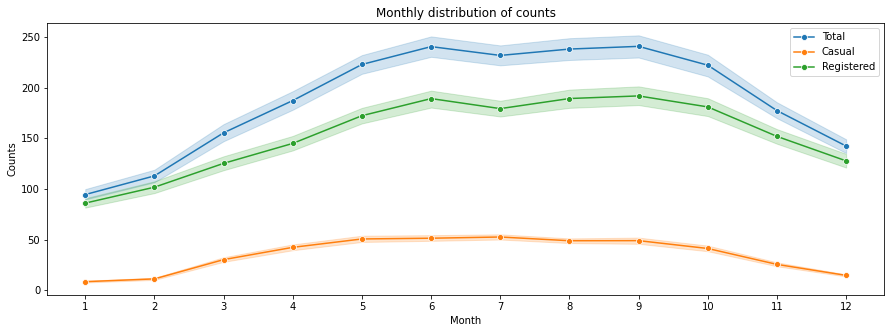

In [ ]:
fig,ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=hourDF,x='month',y='cnt_total',label='Total', marker ='o')
sns.lineplot(data=hourDF,x='month',y='cnt_casual',label='Casual',marker ='o')
sns.lineplot(data=hourDF,x='month',y='cnt_registered',label='Registered',marker ='o')
plt.legend()
plt.title('Monthly distribution of counts')
plt.ylabel('Counts')
plt.xlabel('Month')
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12))

* We can see that registered users has much higher usage propotion campare with casual users.

* Registered users' workingday usage is greater than non-workingday. On the other hand, casual users' non-workingday usage is greater than workingday.

* We can see that the usage of workingday drop significantly on July and August. Students are off-campus during summer vacations may one of the main reasons.




Text(0.5, 1.0, 'Registered Counts')

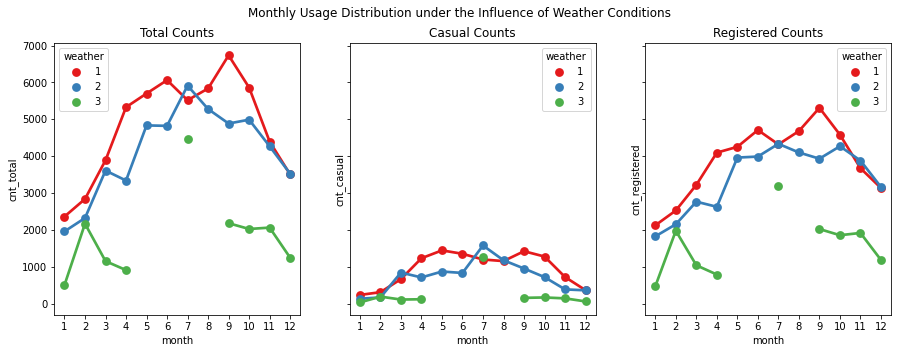

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(15, 5), sharey=True)
fig.suptitle('Monthly Usage Distribution under the Influence of Weather Conditions')
sns.pointplot(ax=ax[0],x='month',y='cnt_total', hue='weather',data=dayDF,ci=None, palette='Set1')
ax[0].set_title('Total Counts')
sns.pointplot(ax=ax[1],x='month',y='cnt_casual', hue='weather',data=dayDF,ci=None, palette='Set1')
ax[1].set_title('Casual Counts')
sns.pointplot(ax=ax[2],x='month',y='cnt_registered', hue='weather',data=dayDF,ci=None, palette='Set1')
ax[2].set_title('Registered Counts')

The detail of four weather conditions
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


*   The weather conditions getting worse while the number is greater. 
*   We can see that condition 1&2 are bearable situation. However, the usage of condition 2 still slighly less than condition 1
*   Condition 3 mostly happen during season 1 & 4, which may explain why season 1 has the lowest usage and season 4 always drop after season 3
*   There are no data of condition 4 show on this plot.




###Hours

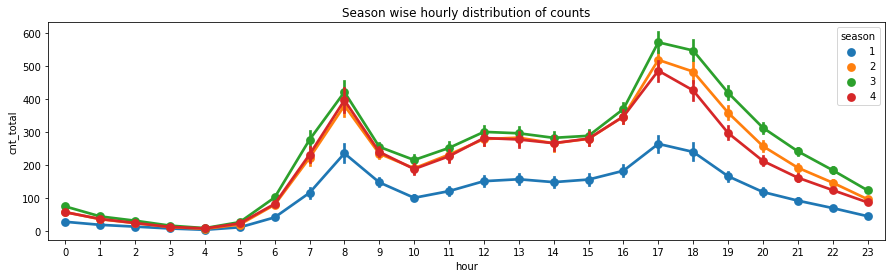

In [ ]:
fig,ax = plt.subplots(figsize=(15,4))

sns.pointplot(data=hourDF[['hour',
                           'cnt_total',
                           'season']],
              x='hour',
              y='cnt_total',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")
plt.show()

There are two peaks during 24 hr, which is 6am-10am and 5pm-19pm. And these two period fit the normal rush hour schedule.

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

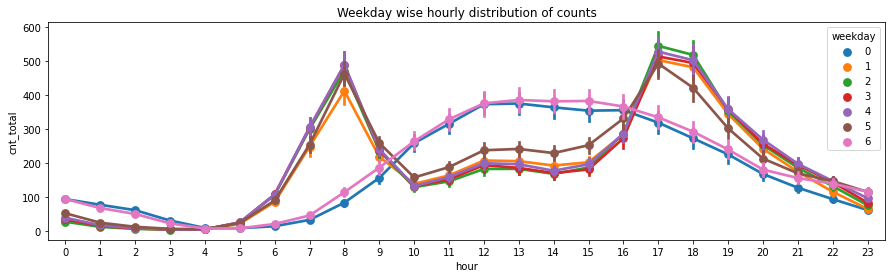

In [ ]:
fig,ax = plt.subplots(figsize=(15,4))
sns.pointplot(data=hourDF[['hour',
                           'cnt_total',
                           'weekday']],
              x='hour',
              y='cnt_total',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

[Text(0.5, 1.0, 'Workingday wise hourly distribution of counts')]

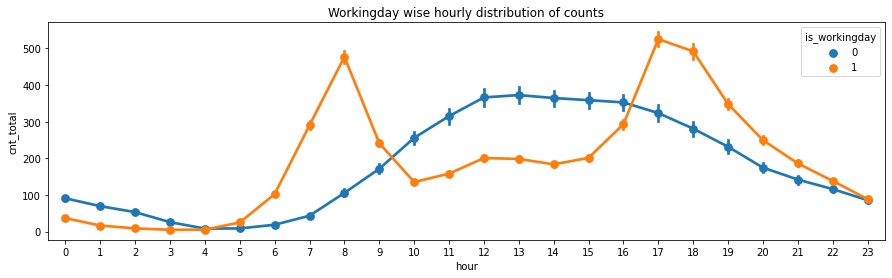

In [ ]:
fig,ax = plt.subplots(figsize=(15,4))
sns.pointplot(data=hourDF[['hour',
                           'cnt_total',
                           'is_workingday']],
              x='hour',
              y='cnt_total',
              hue='is_workingday',
              ax=ax)
ax.set(title="Workingday wise hourly distribution of counts")

These plot back up the theory that rush hour cause the two peaks. Because there is no peak at 6am-10am and 5pm-19pm on weekends.

[Text(0.5, 1.0, 'weather wise hourly distribution of counts')]

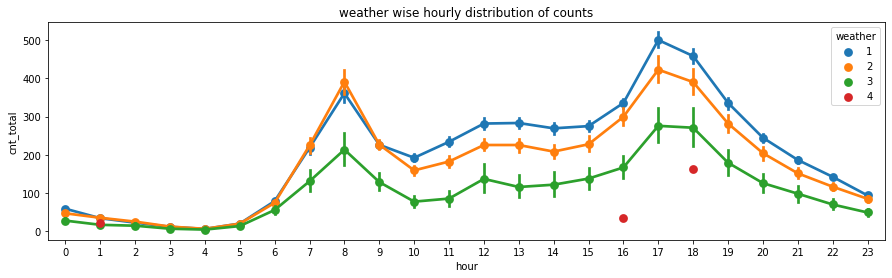

In [ ]:
fig,ax = plt.subplots(figsize=(15,4))
sns.pointplot(data=hourDF[['hour',
                           'cnt_total',
                           'weather']],
              x='hour',
              y='cnt_total',
              hue='weather',
              ax=ax)
ax.set(title="weather wise hourly distribution of counts")

Here we can see that under weather condition 4, there is almost no usage.

##Weather

### Temperature

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(393.80000000000007, 0.5, 'Usage Counts')

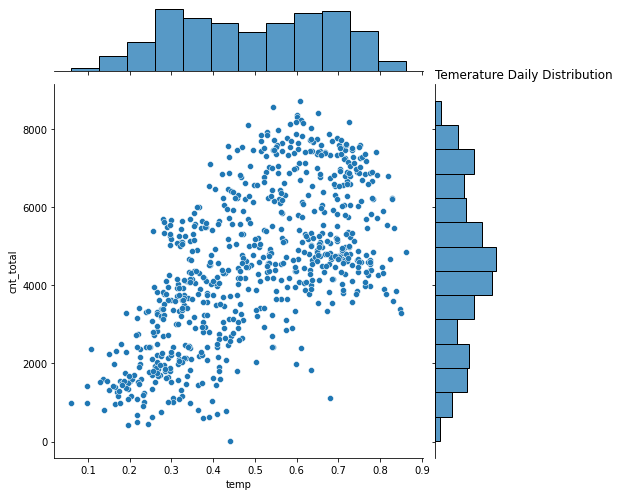

In [ ]:
sns.jointplot('temp','cnt_total',data=dayDF,size=7)
plt.title('Temerature Daily Distribution',loc='left')
plt.xlabel('Normalized temperature in Celsius')
plt.ylabel('Usage Counts')
# Normalized temperature in Celsius =  (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(393.80000000000007, 0.5, 'Usage Counts')

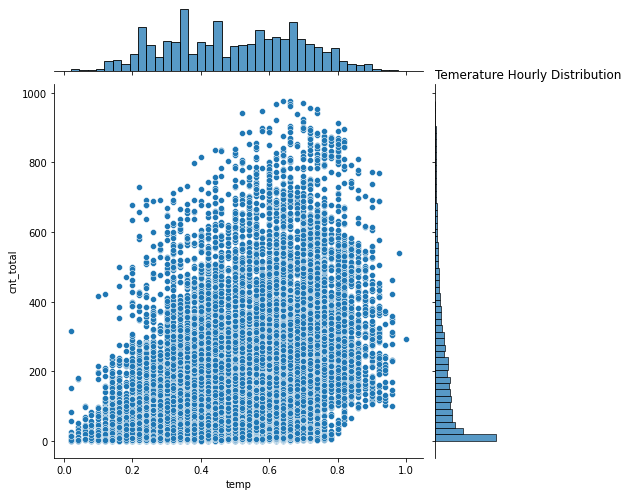

In [ ]:
sns.jointplot('temp','cnt_total',data=hourDF,size=7)
plt.title('Temerature Hourly Distribution',loc='left')
plt.xlabel('Normalized temperature in Celsius')
plt.ylabel('Usage Counts')
# Normalized temperature in Celsius = (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)

Text(0, 0.5, 'Days')

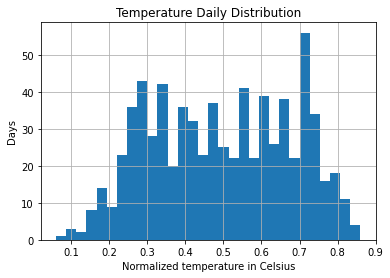

In [ ]:
temp = pd.DataFrame()
temp['temp'] = round(dayDF['temp'],2)
temp.hist(bins =30)
plt.title('Temperature Daily Distribution')
plt.xlabel('Normalized temperature in Celsius')
plt.ylabel('Days')

Text(0, 0.5, 'Days')

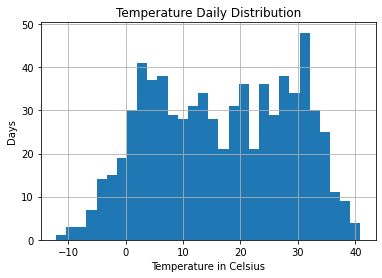

In [ ]:
temp['temp_real'] = (dayDF['temp']*66)-16
temp['temp_real'].hist(bins =30)
plt.title('Temperature Daily Distribution')
plt.xlabel('Temperature in Celsius')
plt.ylabel('Days')

The distribution of temperature-usage is close to normal distribution.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


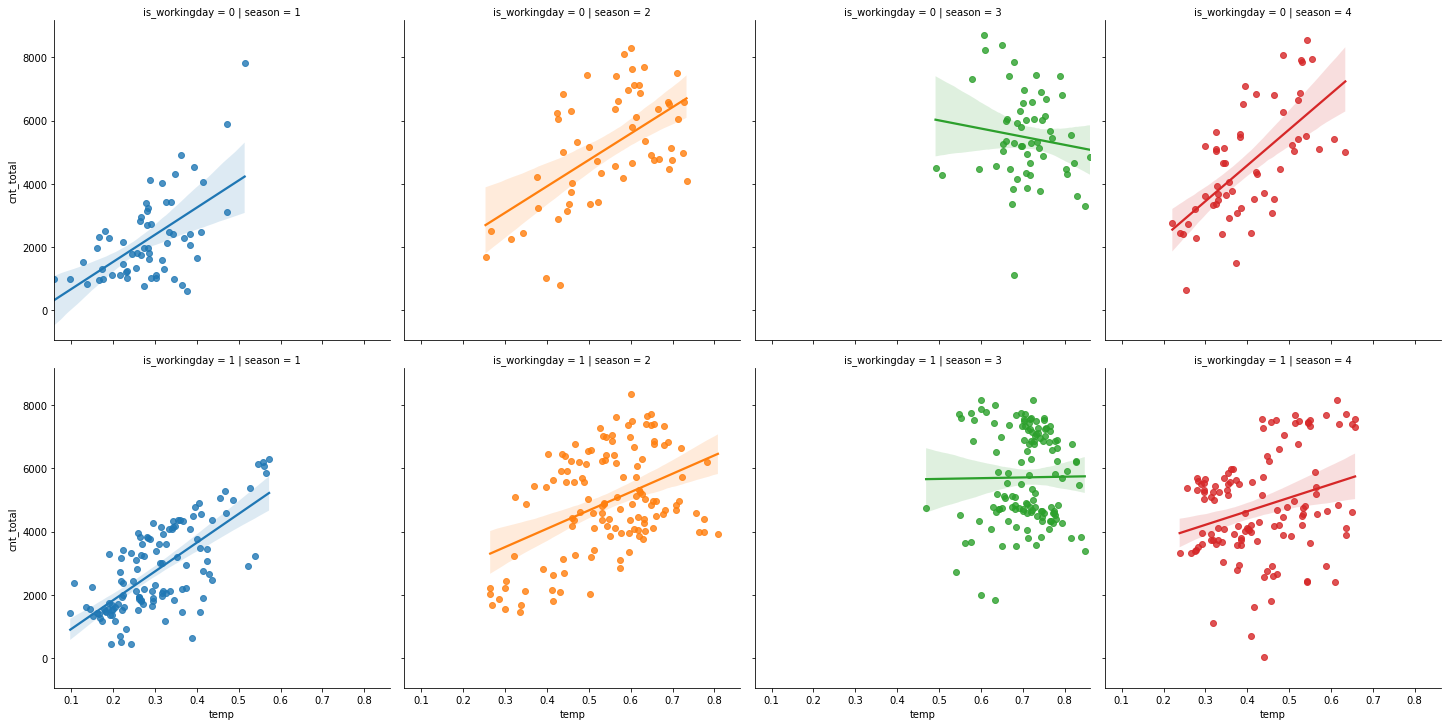

In [ ]:
## Temperature Pattern in Total Counts for Seasons
sns.lmplot('temp','cnt_total',row='is_workingday',hue = 'season',col='season',data=dayDF)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


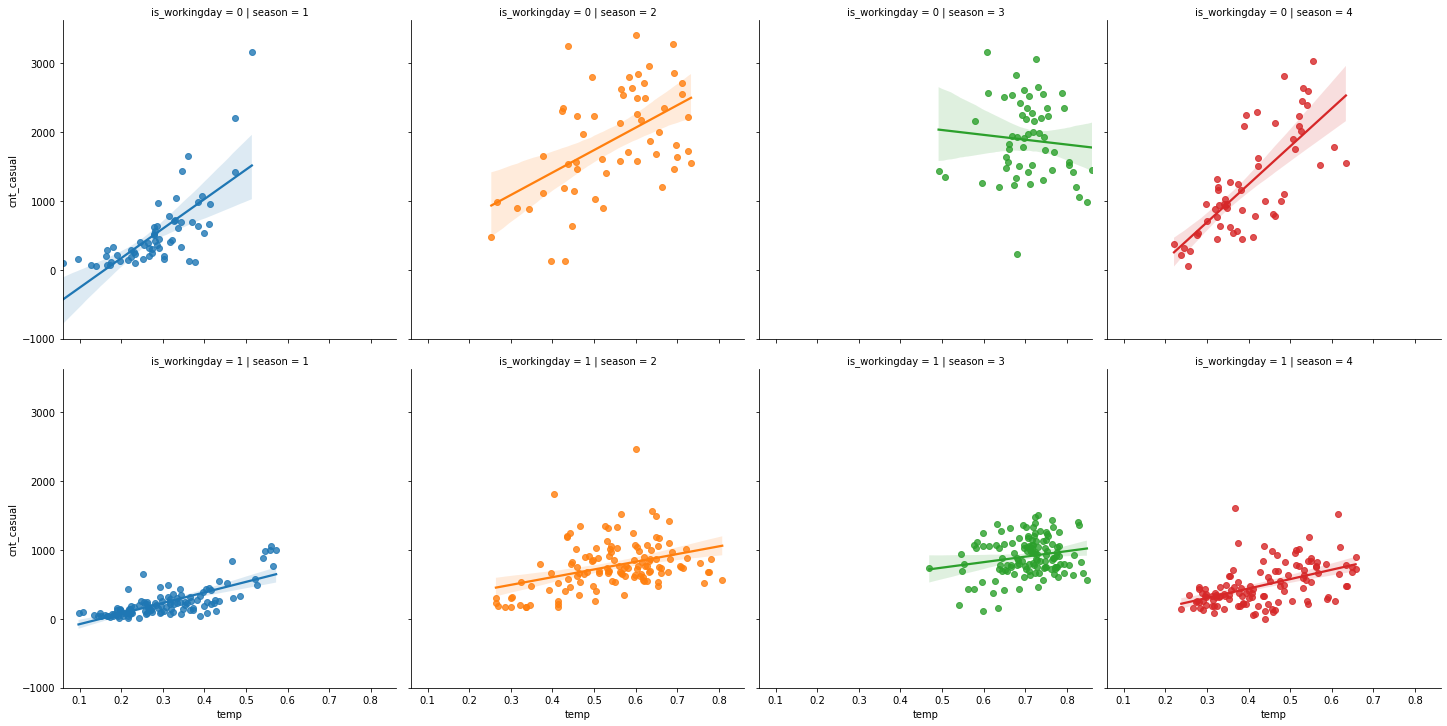

In [ ]:
## Temperature Pattern in Casual Users Counts for Seasons
sns.lmplot('temp','cnt_casual',row='is_workingday',hue = 'season',col='season',data=dayDF)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


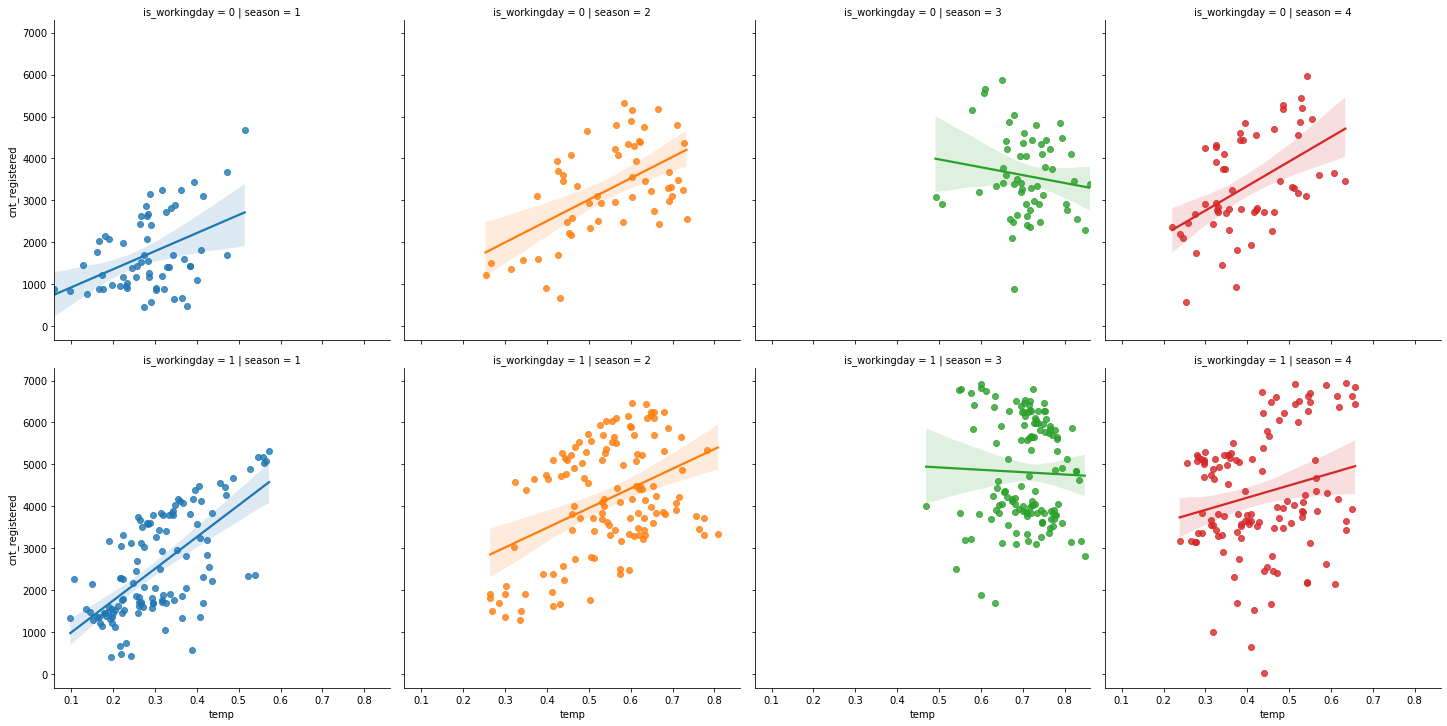

In [ ]:
## Temperature Pattern in Registered Users Counts for Seasons
sns.lmplot('temp','cnt_registered',row='is_workingday',hue = 'season',col='season',data=dayDF)



*   The general temperature of four seasons is season 1 < season 4 < season 2 < season 3 
*   Generally speaking, usage is higher if the weather is warmer. However, from the pattern of season 3, we can see that if the Normalized temperature in Celsiu is higher than about 0.7, the usage may decrease, especially on non-workingday.
*   There is no significant difference in the pattern between casual users and registered users.



### Humidity

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 1.0, 'Humidity Daily Distribution')

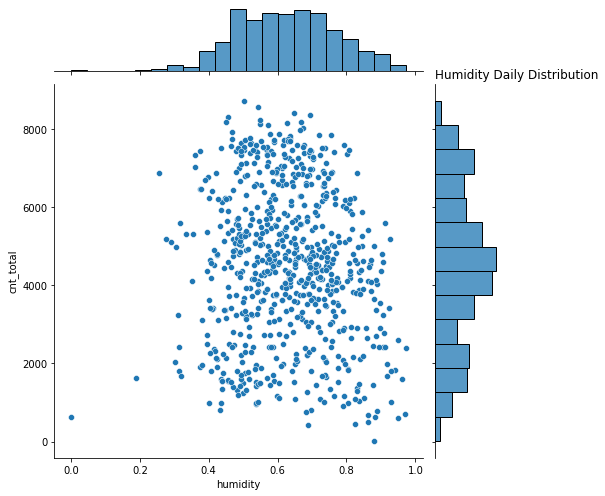

In [ ]:
sns.jointplot('humidity','cnt_total',data=dayDF,size=7)
plt.title('Humidity Daily Distribution',loc='left')
#Normalized humidity. The values are divided to 100 (max)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 1.0, 'Humidity Hourly Distribution')

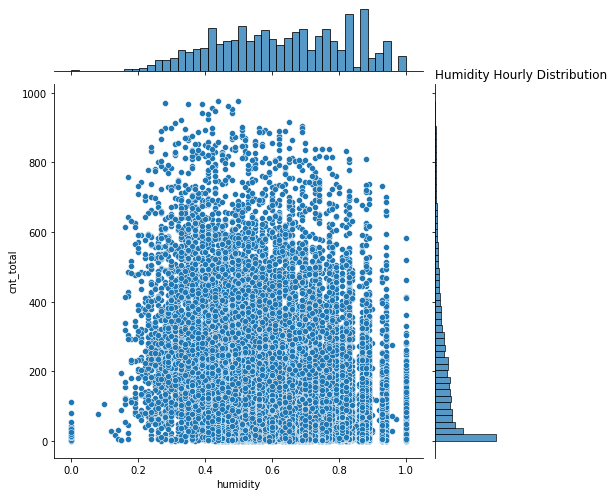

In [ ]:
sns.jointplot('humidity','cnt_total',data=hourDF,size=7)
plt.title('Humidity Hourly Distribution',loc='left')

Text(0, 0.5, 'Days')

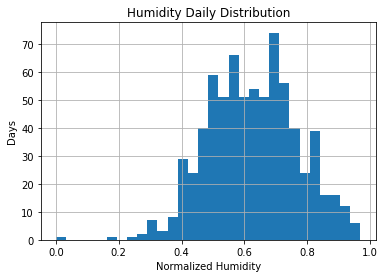

In [ ]:
hum = pd.DataFrame()
hum['humidity'] = round(dayDF['humidity'],2)
hum.hist(bins =30)
plt.title('Humidity Daily Distribution')
plt.xlabel('Normalized Humidity')
plt.ylabel('Days')

Text(0, 0.5, 'Days')

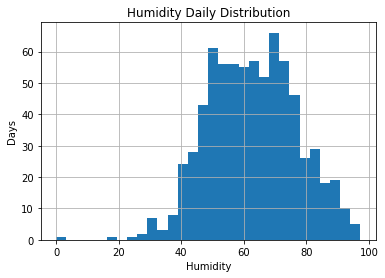

In [ ]:
hum['hum_real'] = dayDF['humidity']*100
hum['hum_real'].hist(bins =30)
plt.title('Humidity Daily Distribution')
plt.xlabel('Humidity')
plt.ylabel('Days')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


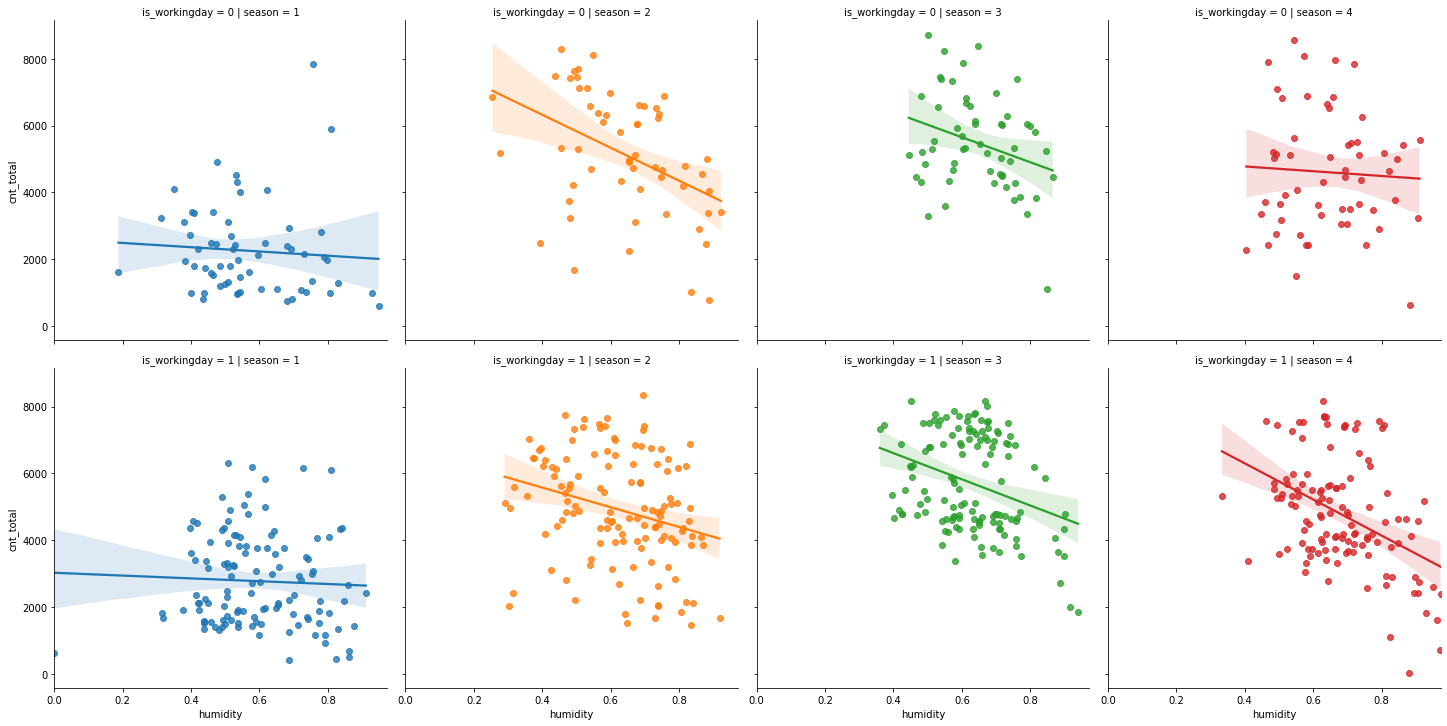

In [ ]:
sns.lmplot('humidity','cnt_total',row='is_workingday',hue = 'season',col='season',data=dayDF)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


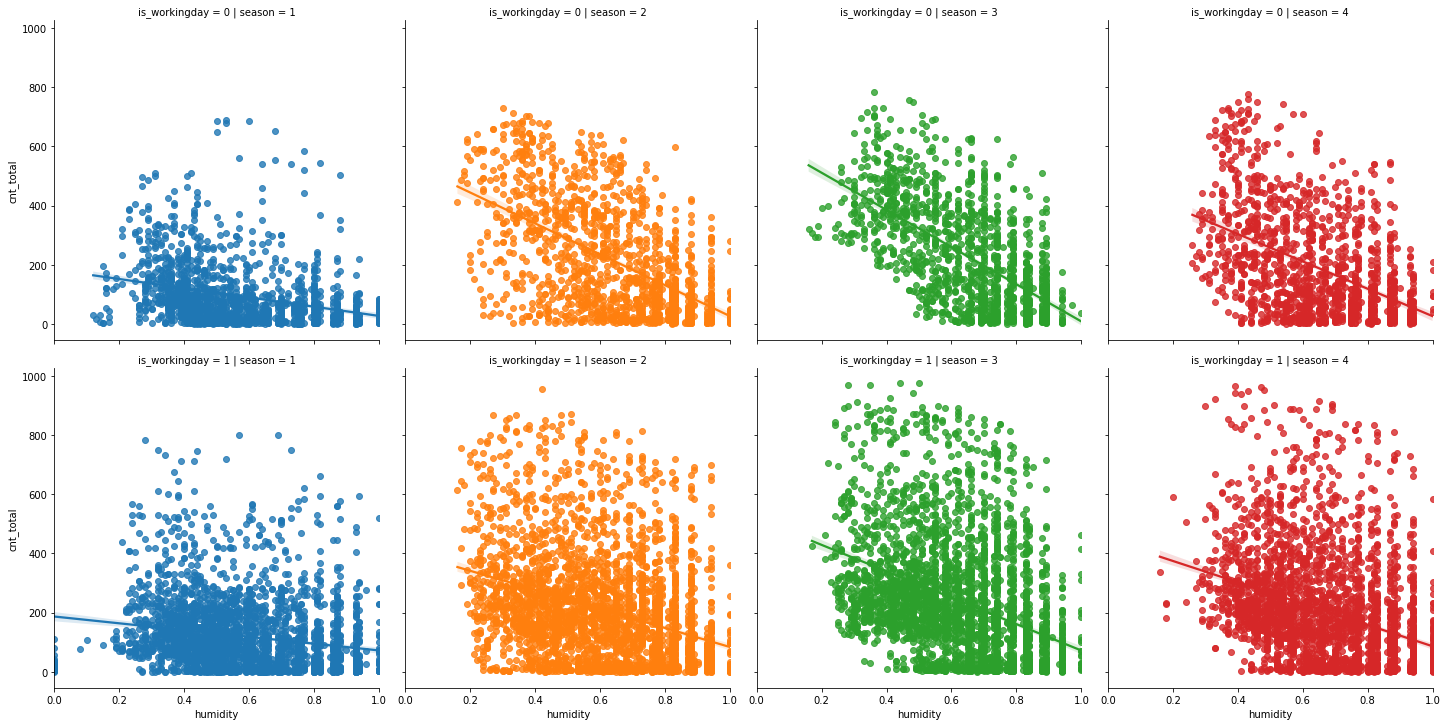

In [ ]:
sns.lmplot('humidity','cnt_total',row='is_workingday',hue = 'season',col='season',data=hourDF)

Generally speaking, the usage would decrease if the normalized humidity is higher.

### Wind Speed

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 1.0, 'Wind Speed Daily Distribution')

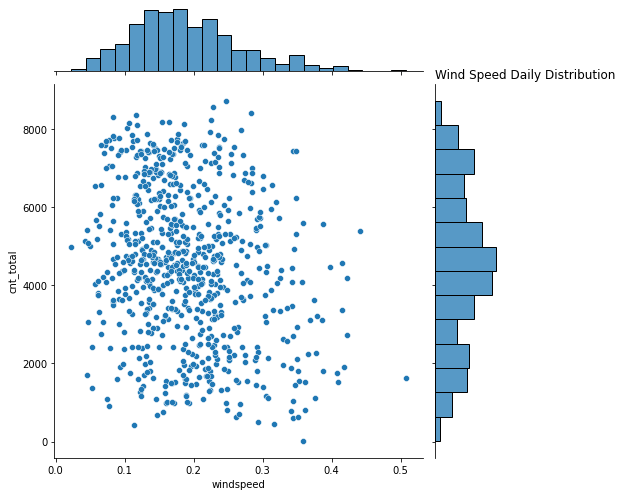

In [ ]:
sns.jointplot('windspeed','cnt_total',data=dayDF,size=7)
plt.title('Wind Speed Daily Distribution',loc='left')
#Normalized wind speed. The values are divided to 67 (max)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 1.0, 'Wind Speed Hourly Distribution')

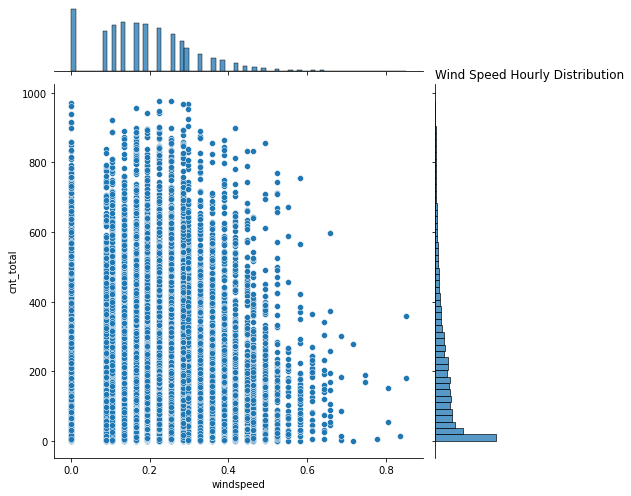

In [ ]:
sns.jointplot('windspeed','cnt_total',data=hourDF,size=7)
plt.title('Wind Speed Hourly Distribution',loc='left')

Text(0, 0.5, 'Days')

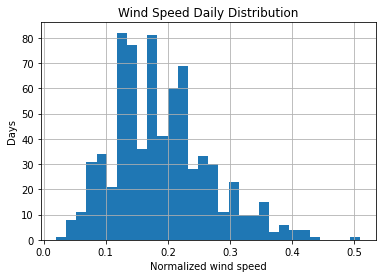

In [ ]:
ws = pd.DataFrame()
ws['windspeed'] = round(dayDF['windspeed'],2)
ws.hist(bins =30)
plt.title('Wind Speed Daily Distribution')
plt.xlabel('Normalized wind speed')
plt.ylabel('Days')

Text(0, 0.5, 'Days')

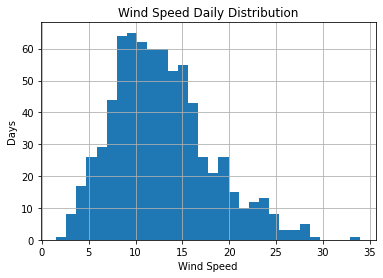

In [ ]:
ws['ws_real'] = dayDF['windspeed']*67
ws['ws_real'].hist(bins =30)
plt.title('Wind Speed Daily Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Days')

The distribution of weedspped-usage is more close to right skewed. It said that the usage may decrease while the windspeed is greater.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


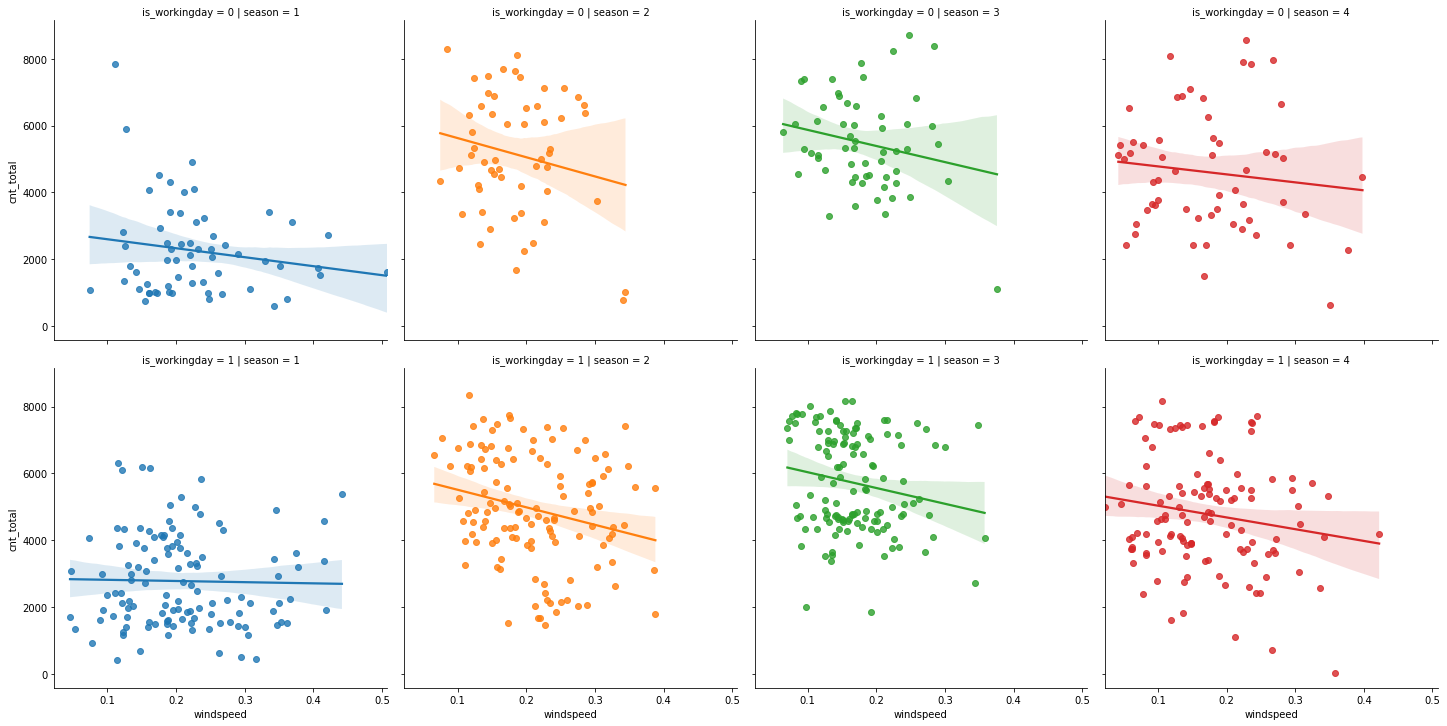

In [ ]:
sns.lmplot('windspeed','cnt_total',row='is_workingday',hue = 'season',col='season',data=dayDF)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


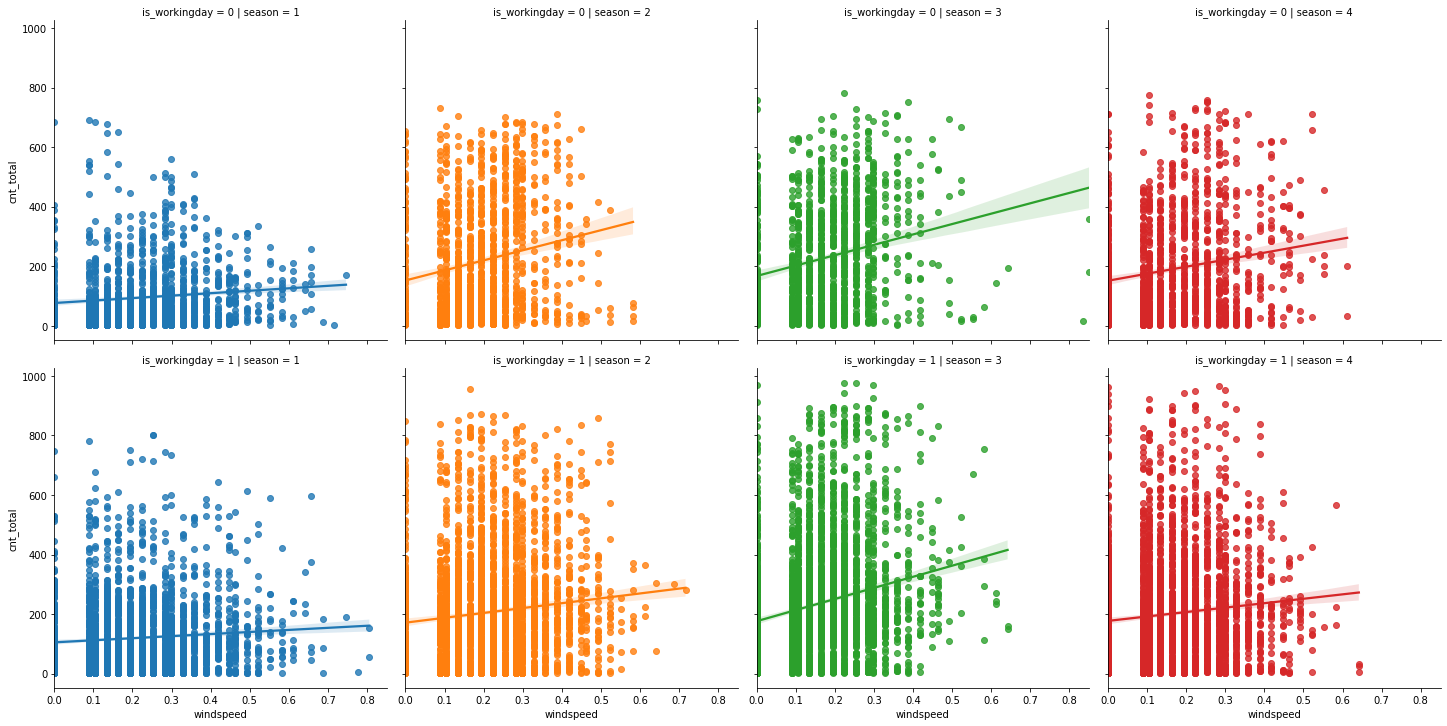

In [ ]:
sns.lmplot('windspeed','cnt_total',row='is_workingday',hue = 'season',col='season',data=hourDF)

Windspeed plays a less important factor to the usage at season1

#Feature Engineering

## Correlation between Columns

In [ ]:
dayDF.drop('case_id',axis=1,inplace=True)
hourDF.drop('case_id',axis=1,inplace=True)

In [ ]:
dayDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        731 non-null    datetime64[ns]
 1   season          731 non-null    int64         
 2   year            731 non-null    int64         
 3   month           731 non-null    int64         
 4   is_holiday      731 non-null    int64         
 5   weekday         731 non-null    int64         
 6   is_workingday   731 non-null    int64         
 7   weather         731 non-null    int64         
 8   temp            731 non-null    float64       
 9   temp_feeling    731 non-null    float64       
 10  humidity        731 non-null    float64       
 11  windspeed       731 non-null    float64       
 12  cnt_casual      731 non-null    int64         
 13  cnt_registered  731 non-null    int64         
 14  cnt_total       731 non-null    int64         
dtypes: dat

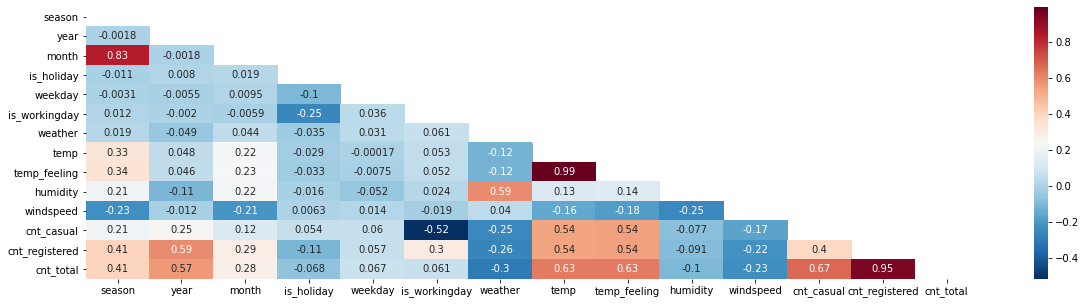

In [ ]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(dayDF.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dayDF.corr(),cmap='RdBu_r',mask=mask, annot=True)

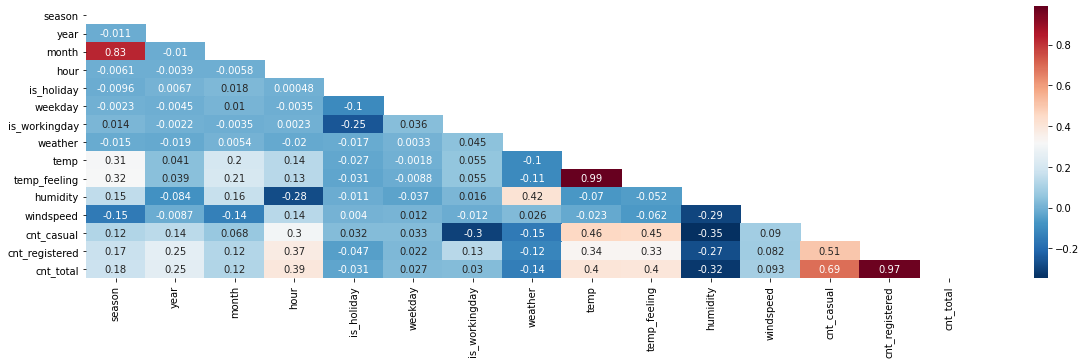

In [ ]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(hourDF.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(hourDF.corr(),cmap='RdBu_r',mask=mask, annot=True)

### Merging two Dataframe

In [ ]:
mergeDF=pd.merge(dayDF,hourDF,how='left',left_on='datetime',right_on='datetime')
mergeDF.head()

case_id_x   datetime  season_x  ...  cnt_casual_y  cnt_registered_y  cnt_total_y
0          1 2011-01-01         1  ...             3                13           16
1          1 2011-01-01         1  ...             8                32           40
2          1 2011-01-01         1  ...             5                27           32
3          1 2011-01-01         1  ...             3                10           13
4          1 2011-01-01         1  ...             0                 1            1

[5 rows x 32 columns]

In [ ]:
merge_adjust_DF = pd.DataFrame(mergeDF)
merge_adjust_DF.drop(['case_id_x','case_id_y','season_y','year_y','month_y','is_holiday_y','weekday_y','is_workingday_y'],axis=1,inplace=True)
merge_adjust_DF.head()

datetime  season_x  year_x  ...  cnt_casual_y  cnt_registered_y  cnt_total_y
0 2011-01-01         1       0  ...             3                13           16
1 2011-01-01         1       0  ...             8                32           40
2 2011-01-01         1       0  ...             5                27           32
3 2011-01-01         1       0  ...             3                10           13
4 2011-01-01         1       0  ...             0                 1            1

[5 rows x 24 columns]

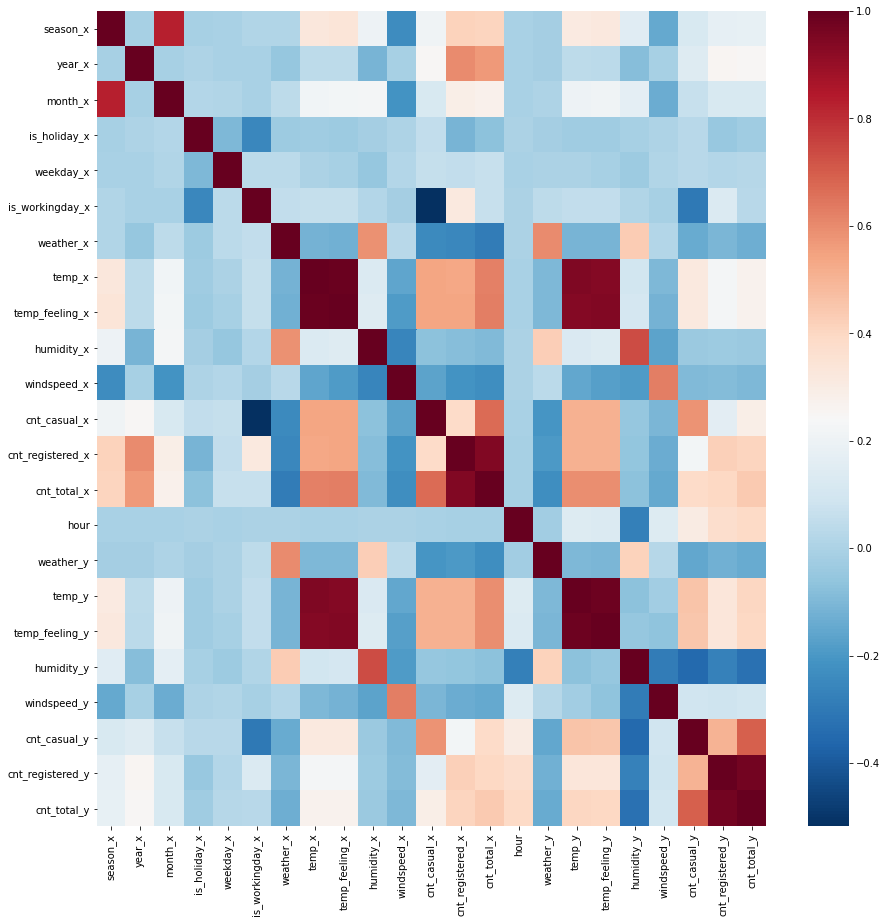

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(merge_adjust_DF.corr(),cmap='RdBu_r',annot=False)

## Setting Category for Some Columns

In [ ]:
dayDF_setCat = pd.DataFrame(dayDF)

dayDF_setCat['season'] = dayDF_setCat.season.astype('category')
dayDF_setCat['is_holiday'] = dayDF_setCat.is_holiday.astype('category')
dayDF_setCat['weekday'] = dayDF_setCat.weekday.astype('category')
dayDF_setCat['weather'] = dayDF_setCat.weather.astype('category')
dayDF_setCat['is_workingday'] = dayDF_setCat.is_workingday.astype('category')
dayDF_setCat['year'] = dayDF_setCat.year.astype('category')
dayDF_setCat['month'] = dayDF_setCat.month.astype('category')

In [ ]:
hourDF_setCat = pd.DataFrame(hourDF)

hourDF_setCat['season'] = hourDF_setCat.season.astype('category')
hourDF_setCat['is_holiday'] = hourDF_setCat.is_holiday.astype('category')
hourDF_setCat['weekday'] = hourDF_setCat.weekday.astype('category')
hourDF_setCat['weather'] = hourDF_setCat.weather.astype('category')
hourDF_setCat['is_workingday'] = hourDF_setCat.is_workingday.astype('category')
hourDF_setCat['year'] = hourDF_setCat.year.astype('category')
hourDF_setCat['month'] = hourDF_setCat.month.astype('category')
hourDF_setCat['hour'] = hourDF_setCat.hour.astype('category')

In [ ]:
mergeAdjDF_setCat= pd.DataFrame(merge_adjust_DF)
mergeAdjDF_setCat['season_x'] = mergeAdjDF_setCat.season_x.astype('category')
mergeAdjDF_setCat['is_holiday_x'] = mergeAdjDF_setCat.is_holiday_x.astype('category')
mergeAdjDF_setCat['weekday_x'] = mergeAdjDF_setCat.weekday_x.astype('category')
mergeAdjDF_setCat['weather_x'] = mergeAdjDF_setCat.weather_x.astype('category')
mergeAdjDF_setCat['weather_y'] = mergeAdjDF_setCat.weather_x.astype('category')
mergeAdjDF_setCat['is_workingday_x'] = mergeAdjDF_setCat.is_workingday_x.astype('category')
mergeAdjDF_setCat['year_x'] = mergeAdjDF_setCat.year_x.astype('category')
mergeAdjDF_setCat['month_x'] = mergeAdjDF_setCat.month_x.astype('category')
mergeAdjDF_setCat['hour'] = mergeAdjDF_setCat.hour.astype('category')

## Features


*   dayDF_setCat
*   hourDF_setCat
*   mergeAdjDF_setCat







In [ ]:
mergeAdjDF_setCat.columns

Index(['case_id_x', 'datetime', 'season_x', 'year_x', 'month_x',
       'is_holiday_x', 'weekday_x', 'is_workingday_x', 'weather_x', 'temp_x',
       'temp_feeling_x', 'humidity_x', 'windspeed_x', 'cnt_casual_x',
       'cnt_registered_x', 'cnt_total_x', 'case_id_y', 'hour', 'weather_y',
       'temp_y', 'temp_feeling_y', 'humidity_y', 'windspeed_y', 'cnt_casual_y',
       'cnt_registered_y', 'cnt_total_y'],
      dtype='object')

In [ ]:
# Features
features_d = ['season','month','is_holiday', 'weekday','is_workingday', 
              'weather', 'temp', 'temp_feeling', 'humidity','windspeed']
features_h = ['season','month','is_holiday', 'weekday','is_workingday', 
              'weather', 'temp', 'temp_feeling', 'humidity','windspeed']
features_m = ['season_x','month_x','hour','is_holiday_x', 'weekday_x','is_workingday_x', 
              'weather_x','weather_y','temp_x','temp_y', 'temp_feeling_x','temp_feeling_y', 
              'humidity_x','humidity_y','windspeed_x','windspeed_y']

# X, features
X_d = dayDF_setCat[features_d]
X_h = hourDF_setCat[features_h]
X_m = mergeAdjDF_setCat[features_m]



# y, Target to predict
y_d = dayDF_setCat['cnt_total'] 
y_h = hourDF_setCat['cnt_total'] 
y_m1 = mergeAdjDF_setCat['cnt_total_x']
y_m2 = mergeAdjDF_setCat['cnt_total_y'] 

# Modeling - Part 1

##Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.2, random_state=42)

#dayDF_setCat
X_d_train, X_d_test, y_d_train, y_d_test= train_test_split(X_d, y_d, test_size = 0.2, random_state=42)

#hourDF_setCat
X_h_train, X_h_test, y_h_train, y_h_test= train_test_split(X_h, y_h, test_size = 0.2, random_state=42)

#mergeAdjDF_setCat
X_m1_train, X_m1_test, y_m1_train, y_m1_test= train_test_split(X_m, y_m1, test_size = 0.2, random_state=42)
X_m2_train, X_m2_test, y_m2_train, y_m2_test= train_test_split(X_m, y_m2, test_size = 0.2, random_state=42)



In [ ]:
print(X_d_test.shape, y_d_test.shape)

(147, 10) (147,)


## Importing Modules

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

###Linear Regression

In [ ]:
#dayDF_setCat
lr = LinearRegression()
lr.fit(X_d_train, y_d_train)
y_d_pred_lr = lr.predict(X_d_test)

In [ ]:
#hourDF_setCat
lr = LinearRegression()
lr.fit(X_h_train, y_h_train)
y_h_pred_lr = lr.predict(X_h_test)

In [ ]:
#mergeAdjDF_setCat: Toal Count by Day
lr = LinearRegression()
lr.fit(X_m1_train, y_m1_train)
y_m1_pred_lr = lr.predict(X_m1_test)

In [ ]:
#mergeAdjDF_setCat: Toal Count by Hour
lr = LinearRegression()
lr.fit(X_m2_train, y_m2_train)
y_m2_pred_lr = lr.predict(X_m2_test)

#### Modle Evaluation

MAE=  1143.3937178558917
MSE=  1796978.1114466996
RMS=  1340.5141220616438
Accuracy - test set: 55.19%


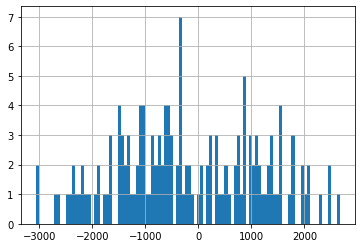

In [ ]:
#dayDF_setCat
errors_d_lr = y_d_test - y_d_pred_lr
errors_d_lr.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_d_test,y_d_pred_lr))
print('MSE= ', metrics.mean_squared_error(y_d_test,y_d_pred_lr))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_d_test,y_d_pred_lr)))

result = lr.score(X_d_test, y_d_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  114.52505364915235
MSE=  23214.507016933465
RMS=  152.36307629125065
Accuracy - test set: 26.69%


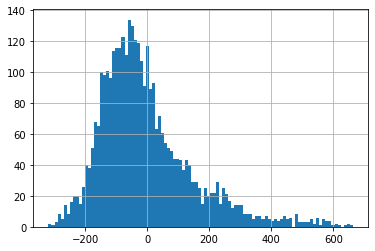

In [ ]:
#hourDF_setCat
errors_h_lr = y_h_test - y_h_pred_lr
errors_h_lr.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_h_test,y_h_pred_lr))
print('MSE= ', metrics.mean_squared_error(y_h_test,y_h_pred_lr))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_h_test,y_h_pred_lr)))

result = lr.score(X_h_test, y_h_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  1116.2273826812211
MSE=  1751551.170503681
RMS=  1323.461813013009
Accuracy - test set: 51.32%


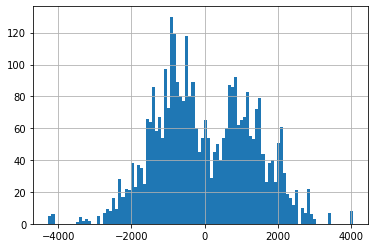

In [ ]:
#mergeAdjDF_setCat: Toal Count by Day
errors_m1_lr = y_m1_test - y_m1_pred_lr
errors_m1_lr.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_m1_test,y_m1_pred_lr))
print('MSE= ', metrics.mean_squared_error(y_m1_test,y_m1_pred_lr))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_m1_test,y_m1_pred_lr)))

result = lr.score(X_m1_test, y_m1_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  103.0768866779453
MSE=  19687.131640307773
RMS=  140.31083935429854
Accuracy - test set: 37.83%


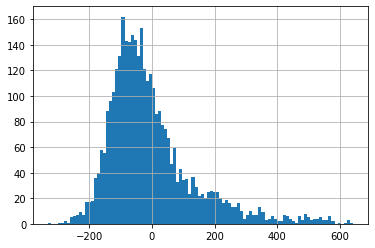

In [ ]:
#mergeAdjDF_setCat: Toal Count by Hour
errors_m2_lr = y_m2_test - y_m2_pred_lr
errors_m2_lr.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_m2_test,y_m2_pred_lr))
print('MSE= ', metrics.mean_squared_error(y_m2_test,y_m2_pred_lr))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_m2_test,y_m2_pred_lr)))

result = lr.score(X_m2_test, y_m2_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

###Support Vector Regression

In [ ]:
#dayDF_setCat
svr = SVR()
svr.fit(X_d_train, y_d_train)
y_d_pred_svr = svr.predict(X_d_test)

In [ ]:
#hourDF_setCat
svr = SVR()
svr.fit(X_h_train, y_h_train)
y_h_pred_svr = svr.predict(X_h_test)

In [ ]:
#mergeAdjDF_setCat: Toal Count by Day
svr = SVR()
svr.fit(X_m1_train, y_m1_train)
y_m1_pred_svr = svr.predict(X_m1_test)

In [ ]:
#mergeAdjDF_setCat: Toal Count by Hour
svr = SVR()
svr.fit(X_m2_train, y_m2_train)
y_m2_pred_svr = svr.predict(X_m2_test)

#### Modle Evaluation

MAE=  1700.7109214744703
MSE=  4033257.698309326
RMS=  2008.2972136387896
Accuracy - test set: -0.58%


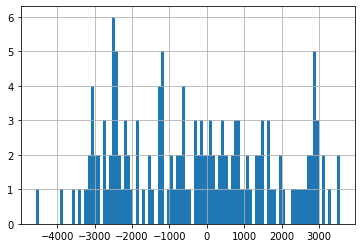

In [ ]:
#hourDF_setCat
errors_d_svr = y_d_test - y_d_pred_svr
errors_d_svr.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_d_test,y_d_pred_svr))
print('MSE= ', metrics.mean_squared_error(y_d_test,y_d_pred_svr))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_d_test,y_d_pred_svr)))

result = svr.score(X_d_test, y_d_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  124.64738374953875
MSE=  29876.074617308263
RMS=  172.84696878252817
Accuracy - test set: 5.65%


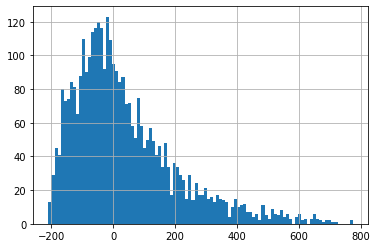

In [ ]:
#hourDF_setCat
errors_h_svr = y_h_test - y_h_pred_svr
errors_h_svr.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_h_test,y_h_pred_svr))
print('MSE= ', metrics.mean_squared_error(y_h_test,y_h_pred_svr))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_h_test,y_h_pred_svr)))

result = svr.score(X_h_test, y_h_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  1497.5867192494334
MSE=  3361363.316570977
RMS=  1833.402115350306
Accuracy - test set: 6.59%


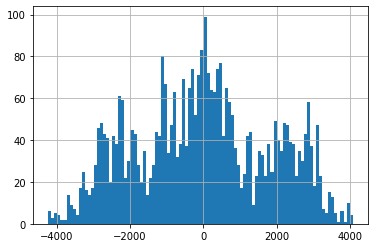

In [ ]:
#mergeAdjDF_setCat: Toal Count by Day
errors_m1_svr = y_m1_test - y_m1_pred_svr
errors_m1_svr.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_m1_test,y_m1_pred_svr))
print('MSE= ', metrics.mean_squared_error(y_m1_test,y_m1_pred_svr))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_m1_test,y_m1_pred_svr)))

result = svr.score(X_m1_test, y_m1_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  91.11130997025951
MSE=  20186.76016992683
RMS=  142.08011884119054
Accuracy - test set: 36.25%


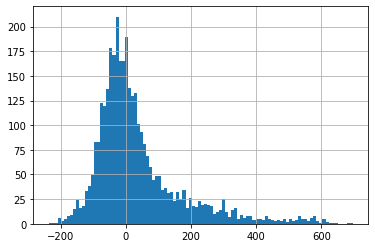

In [ ]:
#mergeAdjDF_setCat: Toal Count by Day
errors_m2_svr = y_m2_test - y_m2_pred_svr
errors_m2_svr.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_m2_test,y_m2_pred_svr))
print('MSE= ', metrics.mean_squared_error(y_m2_test,y_m2_pred_svr))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_m2_test,y_m2_pred_svr)))

result = svr.score(X_m2_test, y_m2_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

### *Decision Tree Regressor

In [ ]:
#dayDF_setCat
dt = DecisionTreeRegressor()
dt.fit(X_d_train, y_d_train)
y_d_pred_dt = dt.predict(X_d_test)

In [ ]:
#hourDF_setCat
dt.fit(X_h_train, y_h_train)
y_h_pred_dt = dt.predict(X_h_test)

In [ ]:
#mergeAdjDF_setCat: Toal Count by Day
dt.fit(X_m1_train, y_m1_train)
y_m1_pred_dt = dt.predict(X_m1_test)

In [ ]:
#mergeAdjDF_setCat: Toal Count by Hour
dt.fit(X_m2_train, y_m2_train)
y_m2_pred_dt = dt.predict(X_m2_test)

#### Modle Evaluation

MAE=  1323.938775510204
MSE=  3069794.2789115645
RMS=  1752.0828401966514
Accuracy - test set: 23.44%


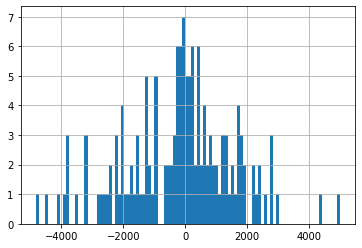

In [ ]:
#dayDF_setCat
errors_d_dt = y_d_test - y_d_pred_dt
errors_d_dt.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_d_test,y_d_pred_dt))
print('MSE= ', metrics.mean_squared_error(y_d_test,y_d_pred_dt))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_d_test,y_d_pred_dt)))

result = dt.score(X_d_test, y_d_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  123.80333237437667
MSE=  33577.2284965957
RMS=  183.2409029026972
Accuracy - test set: -6.04%


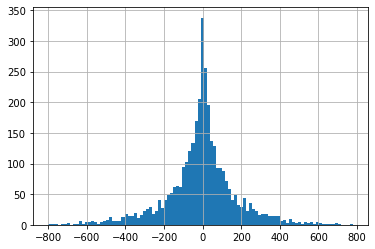

In [ ]:
#hourDF_setCat
errors_h_dt = y_h_test - y_h_pred_dt
errors_h_dt.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_h_test,y_h_pred_dt))
print('MSE= ', metrics.mean_squared_error(y_h_test,y_h_pred_dt))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_h_test,y_h_pred_dt)))

result = dt.score(X_h_test, y_h_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  0.0
MSE=  0.0
RMS=  0.0
Accuracy - test set: 100.00%


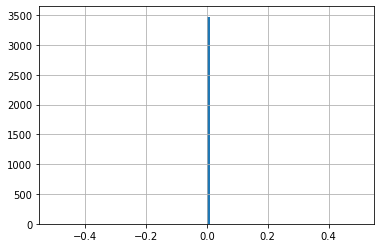

In [ ]:
#mergeAdjDF_setCat: Toal Count by Day
errors_m1_dt = y_m1_test - y_m1_pred_dt
errors_m1_dt.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_m1_test,y_m1_pred_dt))
print('MSE= ', metrics.mean_squared_error(y_m1_test,y_m1_pred_dt))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_m1_test,y_m1_pred_dt)))

result = dt.score(X_m1_test, y_m1_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  49.59867663981588
MSE=  6717.512945914845
RMS=  4702.988284310204
Accuracy - test set: 78.79%


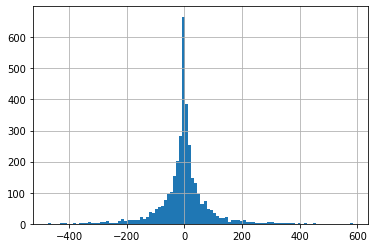

In [ ]:
#mergeAdjDF_setCat: Toal Count by Day
errors_m2_dt = y_m2_test - y_m2_pred_dt
errors_m2_dt.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_m2_test,y_m2_pred_dt))
print('MSE= ', metrics.mean_squared_error(y_m2_test,y_m2_pred_dt))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_m1_test,y_m2_pred_dt)))

result = dt.score(X_m2_test, y_m2_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

### *Random Forest Regressor

In [ ]:
#dayDF_setCat
rf = RandomForestRegressor()
rf.fit(X_d_train, y_d_train)
y_d_pred_rf = rf.predict(X_d_test)

In [ ]:
#hourDF_setCat
rf.fit(X_h_train, y_h_train)
y_h_pred_rf = rf.predict(X_h_test)

In [ ]:
#mergeAdjDF_setCat: Toal Count by Day
rf.fit(X_m1_train, y_m1_train)
y_m1_pred_rf = rf.predict(X_m1_test)

In [ ]:
#mergeAdjDF_setCat: Toal Count by Hour
rf.fit(X_m2_train, y_m2_train)
y_m2_pred_rf = rf.predict(X_m2_test)

#### Modle Evaluation

MAE=  1090.2920408163266
MSE=  1730000.5916387755
RMS=  1315.294868703887
Accuracy - test set: 56.86%


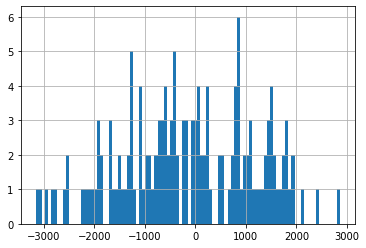

In [ ]:
#dayDF_setCat
errors_d_rf = y_d_test - y_d_pred_rf
errors_d_rf.hist(bins=100)


print('MAE= ', metrics.mean_absolute_error(y_d_test,y_d_pred_rf))
print('MSE= ', metrics.mean_squared_error(y_d_test,y_d_pred_rf))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_d_test,y_d_pred_rf)))

result = rf.score(X_d_test, y_d_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  97.89758835322235
MSE=  18852.986282049165
RMS=  137.306177144545
Accuracy - test set: 40.46%


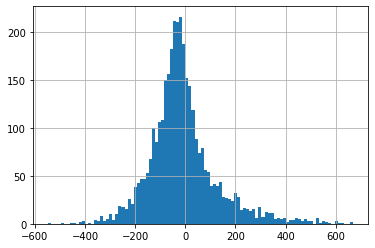

In [ ]:
#hourDF_setCat
errors_h_rf = y_h_test - y_h_pred_rf
errors_h_rf.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_h_test,y_h_pred_rf))
print('MSE= ', metrics.mean_squared_error(y_h_test,y_h_pred_rf))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_h_test,y_h_pred_rf)))

result = rf.score(X_h_test, y_h_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  0.34074798619102287
MSE=  8.479385097813548
RMS=  2.9119383746593175
Accuracy - test set: 100.00%


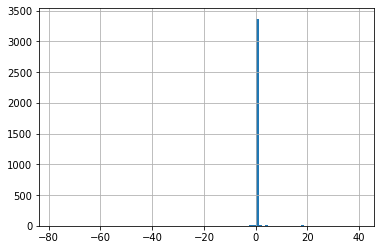

In [ ]:
#mergeAdjDF_setCat: Toal Count by Day
errors_m1_rf = y_m1_test - y_m1_pred_rf
errors_m1_rf.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_m1_test,y_m1_pred_rf))
print('MSE= ', metrics.mean_squared_error(y_m1_test,y_m1_pred_rf))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_m1_test,y_m1_pred_rf)))

result = rf.score(X_m1_test, y_m1_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

MAE=  36.04321921749137
MSE=  3185.0065754602992
RMS=  56.435862494164994
Accuracy - test set: 89.94%


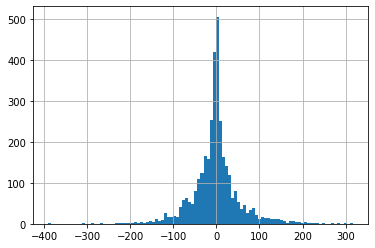

In [ ]:
#mergeAdjDF_setCat: Toal Count by Hour
errors_m2_rf = y_m2_test - y_m2_pred_rf
errors_m2_rf.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_m2_test,y_m2_pred_rf))
print('MSE= ', metrics.mean_squared_error(y_m2_test,y_m2_pred_rf))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_m2_test,y_m2_pred_rf)))

result = rf.score(X_m2_test, y_m2_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

#Modeling - Part 2

*   Using Merge Dataframe
*   Decision Tree
*   Random Forest





### One-Hot Encoding Transforms

In [ ]:
# Defining categorical variables encoder method
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
    lEncoder = preprocessing.LabelEncoder()
    lEncoder_labels = lEncoder.fit_transform(df[col_name])
    df[col_name+'_label'] = lEncoder
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in lEncoder.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return lEncoder,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,lEncoder,ohe,col_name):
    """This function performs one hot encoding for the specified column using the specified encoder objects.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        lEncoder(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded
    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = lEncoder.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in lEncoder.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

In [ ]:
# Encoding all the categorical features
cat_attr_list = ['month_x',
                 'season_x','is_holiday_x','is_workingday_x',
                 'weekday_x',
                 'weather_x','weather_y',
                 'hour']
# though we have transformed all categoricals into their one-hot encodings, note that ordinal
# attributes such as hour, weekday, and so on do not require such encoding.
numeric_feature_cols = ['temp_x','temp_feeling_x','humidity_x','windspeed_x',
                        'temp_y','temp_feeling_y','humidity_y','windspeed_y',
                        'hour','weekday_x','month_x']
subset_cat_features =  ['season_x','is_holiday_x','is_workingday_x','weather_x','weather_y']

### mergeAdjDF_setCat: Toal Count by Day

In [ ]:
X_m1_train.reset_index(inplace=True)
y_m1_train = y_m1_train .reset_index()

X_m1_test.reset_index(inplace=True)
y_m1_test = y_m1_test.reset_index()

In [ ]:

#################
# Train dataset #
#################
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X_m1_train,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})


feature_df_list  = [X_m1_train[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Train dataset shape::{}".format(train_df_new.shape))
print(train_df_new.head())

################
# Test dataset #
################
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    lEncoder = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_m1_test,
                                                              lEncoder,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_m1_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Test dataset shape::{}".format(test_df_new.shape))
print(test_df_new.head())

Train dataset shape::(13903, 25)
     temp_x  temp_feeling_x  humidity_x  ...  weather_y_1  weather_y_2  weather_y_3
0  0.233333        0.248112    0.498750  ...          0.0          1.0          0.0
1  0.471667        0.463375    0.622917  ...          1.0          0.0          0.0
2  0.410000        0.400246    0.970417  ...          0.0          0.0          1.0
3  0.378333        0.378767    0.480000  ...          1.0          0.0          0.0
4  0.274783        0.279961    0.681304  ...          1.0          0.0          0.0

[5 rows x 25 columns]
Test dataset shape::(3476, 25)
     temp_x  temp_feeling_x  humidity_x  ...  weather_y_1  weather_y_2  weather_y_3
0  0.731667        0.652792    0.534583  ...          1.0          0.0          0.0
1  0.273043        0.252304    0.381304  ...          1.0          0.0          0.0
2  0.330833        0.318812    0.585833  ...          0.0          1.0          0.0
3  0.722500        0.672992    0.684583  ...          1.0          0.0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

####Modeling

In [ ]:
#y_m1_train.drop('level_0',axis=1,inplace=True)
#X_m1_train.drop('level_0',axis=1,inplace=True)

In [ ]:
print(X_m1_train.shape,y_m1_train.shape)
print(X_m1_test.shape,y_m1_test.shape)
print(train_df_new.shape,test_df_new.shape)

(13903, 25) (13903, 2)
(3476, 25) (3476, 2)
(13903, 25) (3476, 25)


In [ ]:
# Constructing train dataset
X = train_df_new
y = y_m1_train#.values.reshape(,1)

# Constructing test dataset
X_test = test_df_new
y_test = y_m1_test#.values.reshape(,1)

print(X.shape,y.shape)
print(X_test.shape,y_test.shape)

(13903, 25) (13903, 2)
(3476, 25) (3476, 2)


####Decision Tree Regressor

In [ ]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

y_m1_pred_dtm = dtm.predict(X_test)

R-Squared on train dataset=0.32546711367856884
R-Squaredon test dataset=0.32903051935805


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

MAE=  2539.531915245757
MSE=  9549681.022763195
RMS=  3090.2558183365977
Accuracy - test set: 32.90%


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


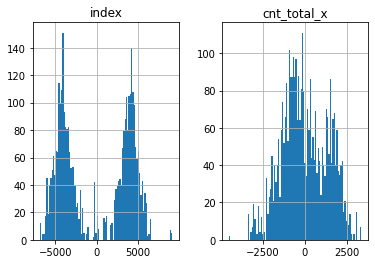

In [ ]:
errors_m1_dtm = y_test - y_m1_pred_dtm
errors_m1_dtm.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_test,y_m1_pred_dtm))
print('MSE= ', metrics.mean_squared_error(y_test,y_m1_pred_dtm))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,y_m1_pred_dtm)))

result = dtm.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

#### *Random Forest

In [ ]:
rfm = RandomForestRegressor()
rfm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

rfm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

y_m1_pred_rfm = rfm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


R-Squared on train dataset=0.32903051935805
R-Squaredon test dataset=0.32903051935805


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


MAE=  127.47396432681268
MSE=  71083.87472031098
RMS=  266.6155935430465
Accuracy - test set: 99.50%


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


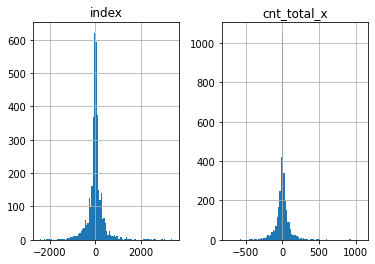

In [ ]:
errors_m1_rfm = y_test - y_m1_pred_rfm
errors_m1_rfm.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_test,y_m1_pred_rfm))
print('MSE= ', metrics.mean_squared_error(y_test,y_m1_pred_rfm))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,y_m1_pred_rfm)))

result = rfm.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

### mergeAdjDF_setCat: Toal Count by Hour

In [ ]:
X_m2_train.reset_index(inplace=True)
y_m2_train = y_m2_train .reset_index()

X_m2_test.reset_index(inplace=True)
y_m2_test = y_m2_test.reset_index()

In [ ]:

#################
# Train dataset #
#################
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X_m2_train,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})


feature_df_list  = [X_m2_train[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Train dataset shape::{}".format(train_df_new.shape))
print(train_df_new.head())

################
# Test dataset #
################
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    lEncoder = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_m2_test,
                                                              lEncoder,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_m2_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Test dataset shape::{}".format(test_df_new.shape))
print(test_df_new.head())

Train dataset shape::(13903, 25)
     temp_x  temp_feeling_x  humidity_x  ...  weather_y_1  weather_y_2  weather_y_3
0  0.233333        0.248112    0.498750  ...          0.0          1.0          0.0
1  0.471667        0.463375    0.622917  ...          1.0          0.0          0.0
2  0.410000        0.400246    0.970417  ...          0.0          0.0          1.0
3  0.378333        0.378767    0.480000  ...          1.0          0.0          0.0
4  0.274783        0.279961    0.681304  ...          1.0          0.0          0.0

[5 rows x 25 columns]
Test dataset shape::(3476, 25)
     temp_x  temp_feeling_x  humidity_x  ...  weather_y_1  weather_y_2  weather_y_3
0  0.731667        0.652792    0.534583  ...          1.0          0.0          0.0
1  0.273043        0.252304    0.381304  ...          1.0          0.0          0.0
2  0.330833        0.318812    0.585833  ...          0.0          1.0          0.0
3  0.722500        0.672992    0.684583  ...          1.0          0.0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

####Modeling

In [ ]:
print(X_m2_train.shape,y_m2_train.shape)
print(X_m2_test.shape,y_m2_test.shape)
print(train_df_new.shape,test_df_new.shape)

(13903, 25) (13903, 2)
(3476, 25) (3476, 2)
(13903, 25) (3476, 25)


In [ ]:
# Constructing train dataset
X = train_df_new
y = y_m2_train#.values.reshape(,1)

# Constructing test dataset
X_test = test_df_new
y_test = y_m2_test#.values.reshape(,1)

print(X.shape,y.shape)
print(X_test.shape,y_test.shape)

(13903, 25) (13903, 2)
(3476, 25) (3476, 2)


####Decision Tree Regressor

In [ ]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

y_m2_pred_dtm = dtm.predict(X_test)

R-Squared on train dataset=0.29974236007358795
R-Squaredon test dataset=0.3111108244520844


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

MAE=  4148.487286095079
MSE=  18867931.047991987
RMS=  4343.723178103318
Accuracy - test set: 31.11%


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


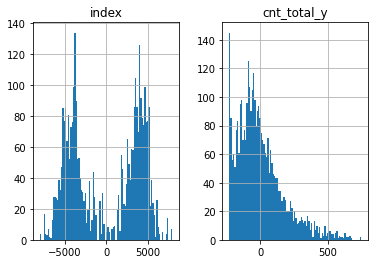

In [ ]:
errors_m2_dtm = y_test - y_m2_pred_dtm
errors_m2_dtm.hist(bins=100)

print('MAE= ', metrics.mean_absolute_error(y_test,y_m1_pred_dtm))
print('MSE= ', metrics.mean_squared_error(y_test,y_m1_pred_dtm))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,y_m1_pred_dtm)))

result = dtm.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

#### *Random Forest

In [ ]:
rfm = RandomForestRegressor()
rfm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

rfm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

y_m2_pred_rfm = rfm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


R-Squared on train dataset=0.3111108244520844
R-Squaredon test dataset=0.3111108244520844


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


MAE=  123.86028049482164
MSE=  71760.61259782795
RMS=  267.88171381755035
Accuracy - test set: 99.42%


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


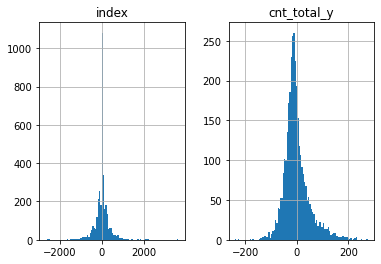

In [ ]:
errors_m2_rfm = y_test - y_m2_pred_rfm
errors_m2_rfm.hist(bins=100)


print('MAE= ', metrics.mean_absolute_error(y_test,y_m2_pred_rfm))
print('MSE= ', metrics.mean_squared_error(y_test,y_m2_pred_rfm))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,y_m2_pred_rfm)))

result = rfm.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))